In [ ]:
# -----------------------------------------------
# Predicting Age at Death Using CDC Mortality Data
# -----------------------------------------------
# Author: Sibo (Carl) Zhou
# Course: DATA 1030: Introduction to Data Science
# Institution: Brown University
# Date: December 15, 2024
#
# Description:
# This code performs exploratory data analysis (EDA), preprocessing, and machine learning models training to predict age at death 
# based on demographic data (sex, marital status, race, ethinicity, etc) 
# using the U.S. CDC 2015 Mortality Dataset.
#
# Requirements:
# - Python 3.8
# - Libraries: numpy, pandas, matplotlib, seaborn, scikit-learn, xgboost, shap
#
# How to Run:
# - Ensure the dataset is placed in the 'data/' directory.
# - Execute this script in the 'src/' directory.
# - Preprocessed results and visualizations will be saved to the 'results/' and 'figures/ directories.
#
# License:
# This code is licensed under the MIT License. See LICENSE file for details.
# -----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_cdc_mortality_data_original.csv')

# Delete the rows with our target variable "detail_age" == "unknown" (which is less than 0.02% of the total rows) and "detailed_age_type" != 1 (meaning the "detail_age" measures months, days, hours, minutes but not years, which we don't need)
count_above_900 = len(df[df['detail_age'] == 999])
total_data = df['detail_age'].shape[0]
proportion_null_age = count_above_900/total_data
print(proportion_null_age)
df_cleaned = df[(df['detail_age'] != 999) & (df['detail_age_type'] == 1) ]

print(df.shape)
print(df_cleaned.shape)

/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/1998699047.py:6: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_cdc_mortality_data_original.csv')


0.00019902891548003493
(2718198, 77)
(2694299, 77)


EDA Section with the following plots/info:

Plots for discovering our target variable "detail_age":

Plot 1. Distribution of Age Recode 12\
Plot 2. Distribution of Age Recode 27\
Plot 3. Distribution of Age Recode 52\
Plot 4. Distribution of detailed_age\
Info 1. Description of our target variable: "detail_age"

Plots for discovering the relationship between variable "sex" and our target variable "detail_age":
Plot 5: Violin Plot between sex and detail_age\
Plot 6: Box Plot grouped by sex and detail_age\
Plot 7: category-specific histogram: sex and detail_age\
Info 2: Description of relationships between sex and detail_age

Plots for discovering the relationship between variable "marital_status" and our target variable "detail_age":
Plot 8: Box Plot of detail_age by marital_status\
Plot 9: Violin Plot of detail_age by marital_status\
Info 3: Description of relationships between marital_status and detail_age

Plots for discovering the relationship between variable "race" and our target variable "detail_age":
Plot 10: Box Plot of detail_age by race\
Info 4: Description of relationships between race and detail_age

Info--variable "resident_status" and our target variable "detail_age":
Info 6: Description of relationships between resident_status and detail_age


Plot 1: Distribution of Age Recode 12


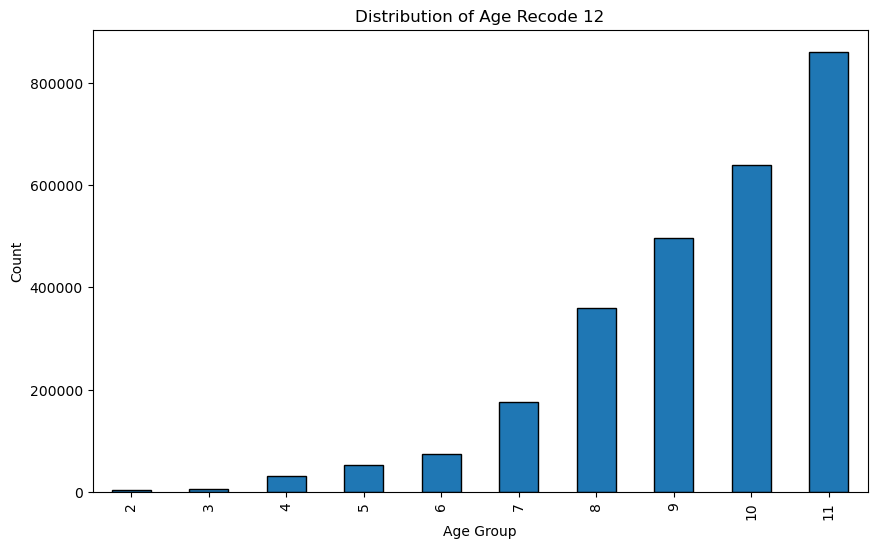

Plot 2: Distribution of Age Recode 27


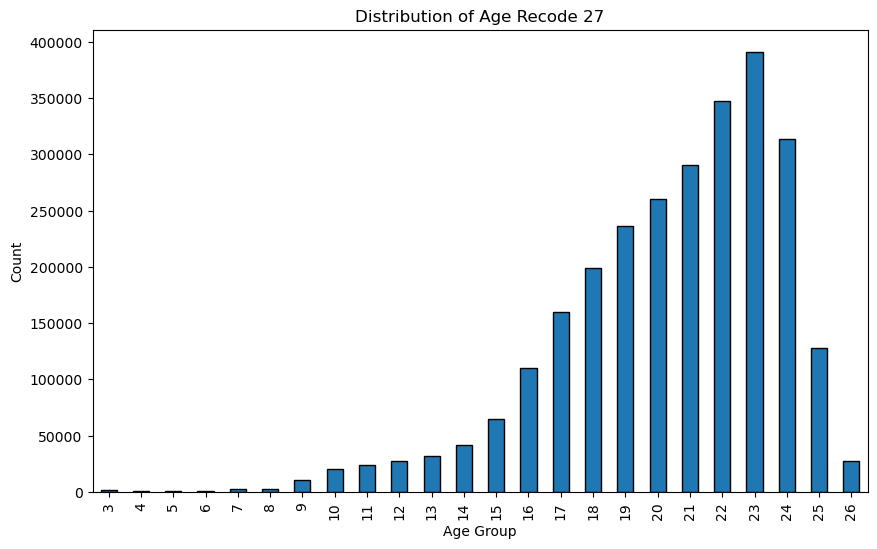

Plot 3: Distribution of Age Recode 52


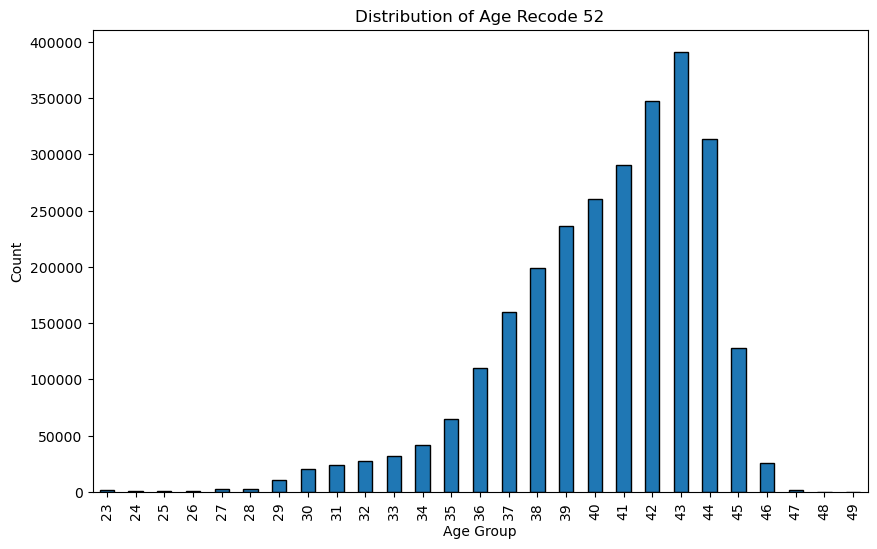

Plot 4: Distribution of detailed_age


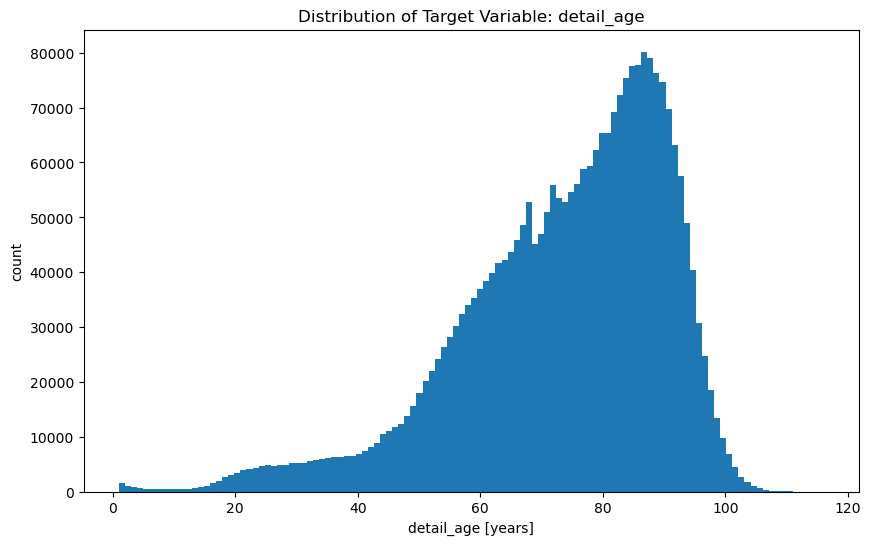

Info 1: Description of our target variable: detail_age
(2694299,)
detail_age
87     80207
88     79107
86     77752
85     77610
89     76322
       ...  
112       14
113        7
114        7
116        3
115        2
Name: count, Length: 116, dtype: int64
count    2.694299e+06
mean     7.383707e+01
std      1.707126e+01
min      1.000000e+00
25%      6.400000e+01
50%      7.700000e+01
75%      8.700000e+01
max      1.160000e+02
Name: detail_age, dtype: float64
77.0
Plot 5: Violin Plot of sex and detail_age


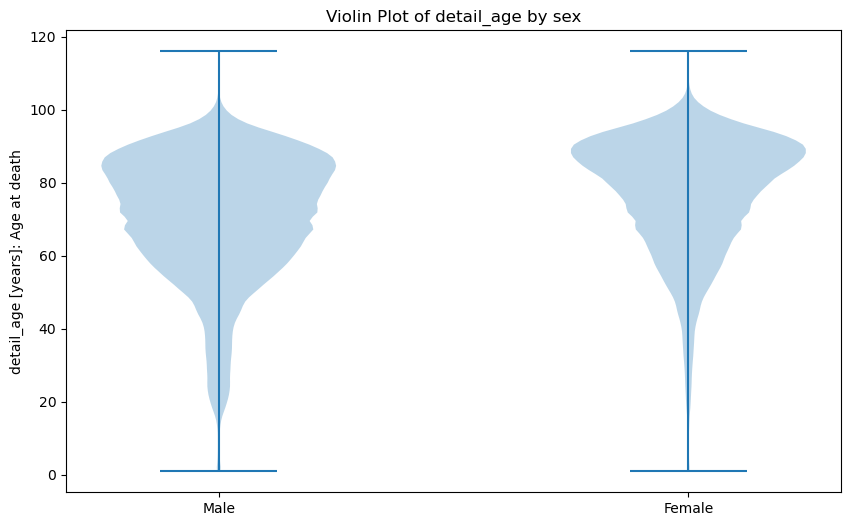

Plot 6: Box Plot of detail_age by sex


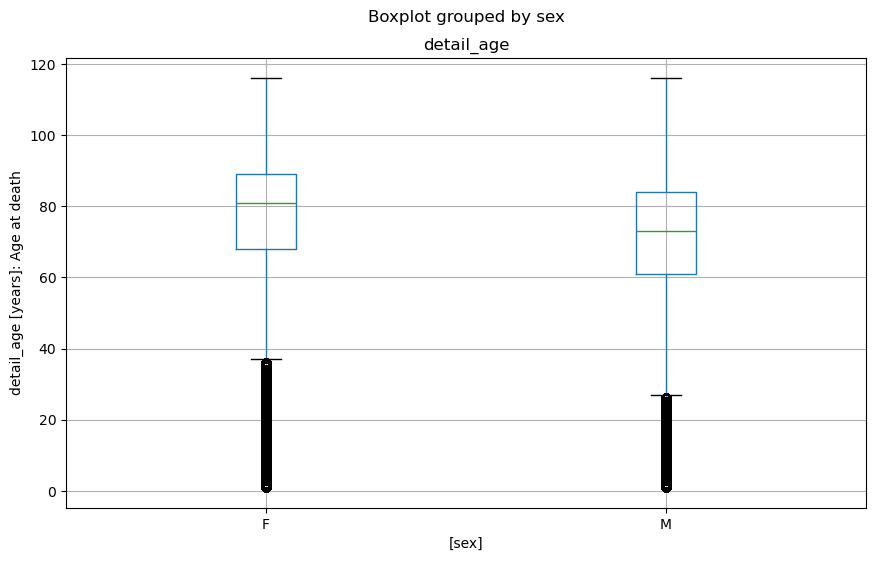

Plot 7: Category-Specific Histogram: sex and detail_age


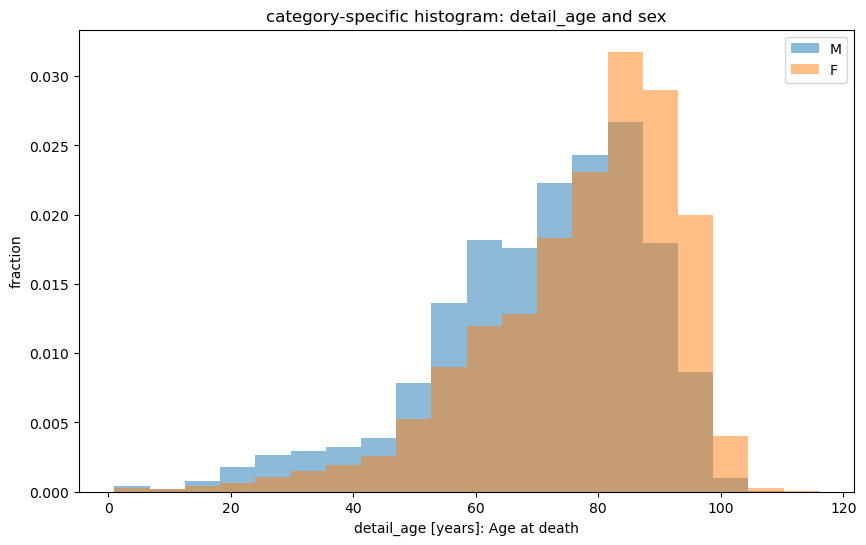

Info 2: Description of relationships between sex and detail_age
Median age for female death 81.0
Median age for male death 73.0
0
2694299
sex
M    1363842
F    1330457
Name: count, dtype: int64
Plot 8: Box Plot of detail_age by marital_status


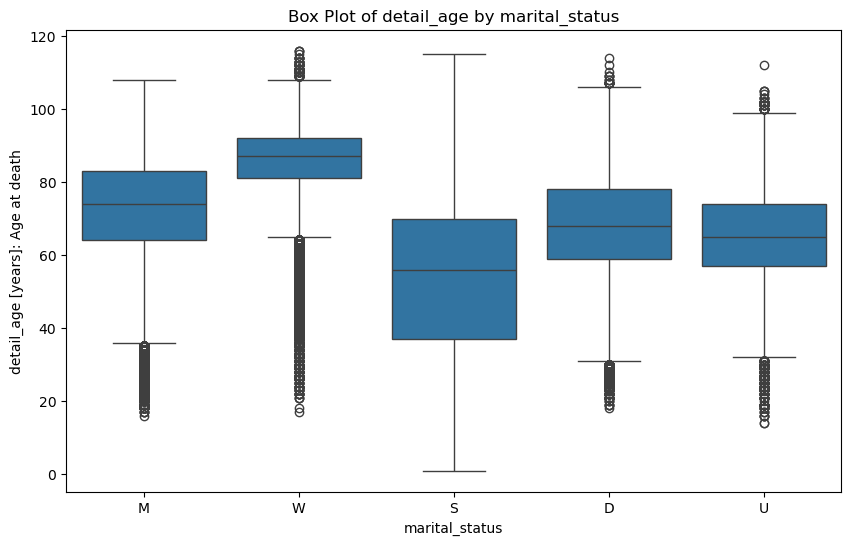

Plot 9: Violin Plot of detail_age by marital_status


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/798025190.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(marital_status_labels)


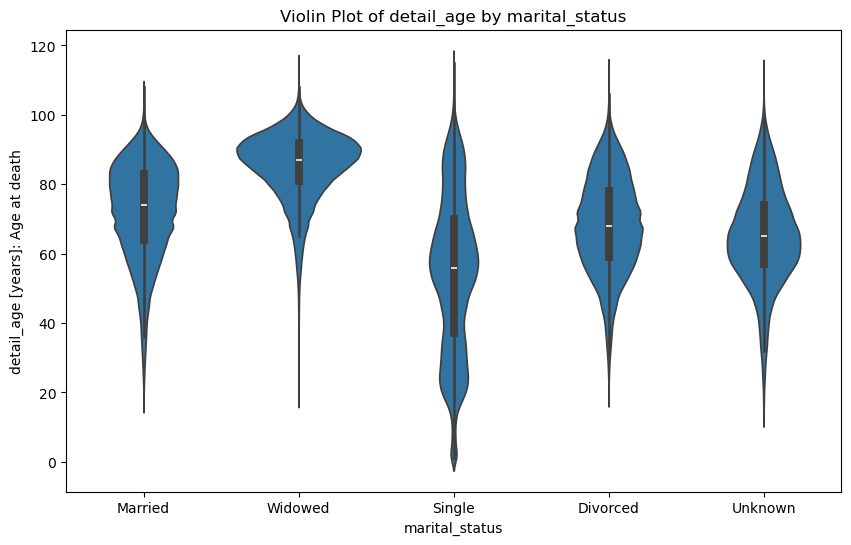

Info 3: Description of relationships between marital_status and detail_age
Percentage of death singles under 40: 72.54841634820907 %
Percentage of death widows over 80: 60.597767803600334 %
Median age for singles death: 56.0
Median age for widowed death: 87.0
Median age for divorced death: 68.0
Median age for married death: 74.0
0
2694299
marital_status
M    1002474
W     921990
D     422284
S     327771
U      19780
Name: count, dtype: int64
Plot 10: Box Plot of detail_age by race


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/798025190.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(race_labels, rotation=60, ha='center')


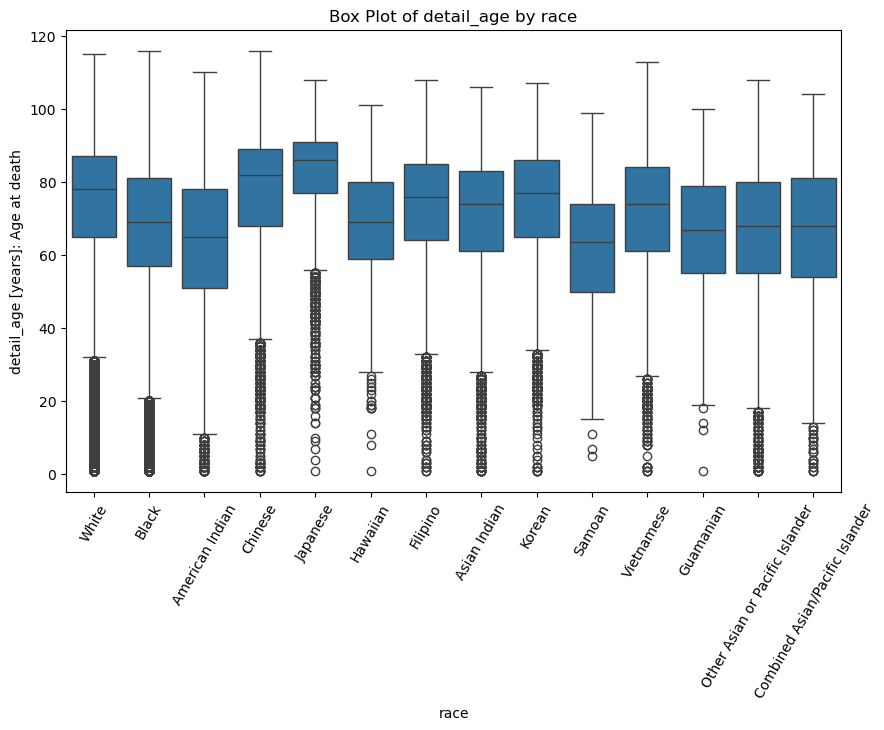

Info 4: Description of relationships between race and detail_age
race
1     2295911
2      313399
3       18677
4       14415
7       11946
5        8502
68       7923
18       7909
48       5492
28       5338
78       2987
6         746
38        670
58        384
Name: count, dtype: int64
Median age for White: 78.0
Median age for Black: 69.0
Median age for American Indian: 65.0
Median age for Chinese: 82.0
Median age for Japanese: 86.0
Median age for Hawaiian: 69.0
Median age for Pilipino: 76.0
Median age for Asian Indian: 74.0
Median age for Korean: 77.0
Median age for Samoan: 63.5
Median age for Vietnamese: 74.0
Median age for Guamanian: 67.0
Median age for Other Asian Pacific Islander: 68.0
Median age for Combined Other Asian Pacific Islander: 68.0
Info 6: Description of relationships between resident_status and detail_age
0
2694299
resident_status
1    2182231
2     424024
3      82782
4       5262
Name: count, dtype: int64
Median age 1: 78.0
Median age 2: 74.0
Median age 3: 72.0

In [206]:
# EDA
#------------------------------------------------------------#
# Plots for discovering our target variable "detail_age"
#------------------------------------------------------------#

# Plot 1: Distribution of Age Recode 12
print("Plot 1: Distribution of Age Recode 12")
plt.figure(figsize=(10, 6))
df_cleaned['age_recode_12'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Recode 12')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig('figures/eda/Plot 1: Distribution of Age Recode 12.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Distribution of Age Recode 27
print("Plot 2: Distribution of Age Recode 27")
plt.figure(figsize=(10, 6))
df_cleaned['age_recode_27'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Recode 27')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig('figures/eda/Plot 2: Distribution of Age Recode 27.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Distribution of Age Recode 52
print("Plot 3: Distribution of Age Recode 52")
plt.figure(figsize=(10, 6))
df_cleaned['age_recode_52'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Recode 52')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig('figures/eda/Plot 3: Distribution of Age Recode 52.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 4: Distribution of detailed_age
print("Plot 4: Distribution of detailed_age")
plt.figure(figsize=(10, 6))
df_cleaned['detail_age'].plot.hist(bins = df_cleaned['detail_age'].nunique())   
plt.xlabel('detail_age [years]')
plt.ylabel('count')
plt.title('Distribution of Target Variable: detail_age')
plt.savefig('figures/eda/Plot 4: Distribution of detailed_age.png', dpi=300, bbox_inches='tight')
plt.show()

# Info 1: Description of our target variable: "detail_age"
print("Info 1: Description of our target variable: detail_age")
print(df_cleaned['detail_age'].shape)
print(df_cleaned['detail_age'].value_counts())
print(df_cleaned['detail_age'].describe())
print(df_cleaned['detail_age'].median())

#------------------------------------------------------------#
# Plots for discovering the relationship between variable "sex" and our target variable "detail_age"
#------------------------------------------------------------#

# Plot 5: Violin Plot between sex and detail_age
print("Plot 5: Violin Plot of sex and detail_age")
dataset = [df_cleaned[df_cleaned['sex']=='M']['detail_age'].values,
           df_cleaned[df_cleaned['sex']=='F']['detail_age'].values]

plt.figure(figsize=(10, 6))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('detail_age [years]: Age at death')
plt.title('Violin Plot of detail_age by sex')
plt.savefig('figures/eda/Plot 5: Violin Plot between sex and detail_age.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 6: Box Plot grouped by sex and detail_age
print("Plot 6: Box Plot of detail_age by sex")
df_cleaned[['detail_age','sex']].boxplot(by='sex',figsize=(10, 6))
plt.ylabel('detail_age [years]: Age at death')
plt.savefig('figures/eda/Plot 6: Box Plot grouped by sex and detail_age.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 7: Category-Specific histogram: sex and detail_age
print("Plot 7: Category-Specific Histogram: sex and detail_age")
categories = df_cleaned['sex'].unique()
bin_range = (df_cleaned['detail_age'].min(),df_cleaned['detail_age'].max())
plt.figure(figsize=(10, 6))
for category in categories:
    plt.hist(df_cleaned[df_cleaned['sex']==category]['detail_age'],alpha=0.5,label=category,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('detail_age [years]: Age at death')
plt.title('category-specific histogram: detail_age and sex')
plt.savefig('figures/eda/Plot 7: category-specific histogram: SEX vs Age at Death.png', dpi=300, bbox_inches='tight')
plt.show()

# Info 2: Description of relationships between sex and detail_age
print("Info 2: Description of relationships between sex and detail_age")
median_age_female = df_cleaned[df_cleaned['sex'] == 'F']['detail_age'].median()
median_age_male = df_cleaned[df_cleaned['sex'] == 'M']['detail_age'].median()

print ("Median age for female death", median_age_female)
print ("Median age for male death", median_age_male)

print(df_cleaned['sex'].isnull().sum())
print(df_cleaned['sex'].shape[0])
print(df_cleaned['sex'].value_counts())

#------------------------------------------------------------#
# Plots for discovering the relationship between variable "marital_status" and our target variable "detail_age"
#------------------------------------------------------------#

# Plot 8: Box Plot of detail_age by marital_status
print("Plot 8: Box Plot of detail_age by marital_status")
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='detail_age', data=df_cleaned)
plt.title('Box Plot of detail_age by marital_status')
plt.xlabel('marital_status')
plt.ylabel('detail_age [years]: Age at death')
plt.savefig('figures/eda/Plot 8: Box Plot of Age by Marital Status.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 9: Violin Plot of detail_age by marital_status
print("Plot 9: Violin Plot of detail_age by marital_status")
marital_status_labels = ['Married', 'Widowed', 'Single', 'Divorced', 'Unknown']
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='marital_status', y='detail_age', data=df_cleaned)
ax.set_xticklabels(marital_status_labels)
plt.title('Violin Plot of detail_age by marital_status')
plt.xlabel('marital_status')
plt.ylabel('detail_age [years]: Age at death')
plt.savefig('figures/eda/Plot 9: Violin Plot of Age by Marital Status.png', dpi=300, bbox_inches='tight')
plt.show()

# Info 3: Description of relationships between marital_status and detail_age
print("Info 3: Description of relationships between marital_status and detail_age")
young_single = df_cleaned[(df_cleaned['detail_age'] < 40) & (df_cleaned['marital_status'] == 'S')].shape[0]
young_total = df_cleaned[df_cleaned['detail_age'] < 40].shape[0]
young_single_percentage = (young_single / young_total) * 100
print("Percentage of death singles under 40:", young_single_percentage, "%")

old_widowed = df_cleaned[(df_cleaned['detail_age'] > 80) & (df_cleaned['marital_status'] == 'W')].shape[0]
old_total = df_cleaned[df_cleaned['detail_age'] > 80].shape[0]
old_widowed_percentage = (old_widowed / old_total) * 100
print("Percentage of death widows over 80:", old_widowed_percentage, "%")

median_age_single = df_cleaned[df_cleaned['marital_status'] == 'S']['detail_age'].median()
median_age_widowed = df_cleaned[df_cleaned['marital_status'] == 'W']['detail_age'].median()
median_age_married = df_cleaned[df_cleaned['marital_status'] == 'M']['detail_age'].median()
median_age_divorced = df_cleaned[df_cleaned['marital_status'] == 'D']['detail_age'].median()

print("Median age for singles death:", median_age_single)
print("Median age for widowed death:", median_age_widowed)
print("Median age for divorced death:", median_age_divorced)
print("Median age for married death:", median_age_married)

print(df_cleaned['marital_status'].isnull().sum())
print(df_cleaned['marital_status'].shape[0])
print(df_cleaned['marital_status'].value_counts())

#------------------------------------------------------------#
# Plots for discovering the relationship between variable "race" and our target variable "detail_age"
#------------------------------------------------------------#

# Plot 10: Box Plot of detail_age by race
print("Plot 10: Box Plot of detail_age by race")
race_labels = [
    'White', 'Black', 'American Indian', 'Chinese', 'Japanese', 
    'Hawaiian', 'Filipino', 'Asian Indian', 'Korean', 'Samoan', 
    'Vietnamese', 'Guamanian', 'Other Asian or Pacific Islander', 
    'Combined Asian/Pacific Islander'
] 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='race', y='detail_age', data=df_cleaned)
ax.set_xticklabels(race_labels, rotation=60, ha='center')
plt.title('Box Plot of detail_age by race')
plt.xlabel('race')
plt.ylabel('detail_age [years]: Age at death')
plt.savefig('figures/eda/Plot 10: Box Plot of Age by Race.png', dpi=300, bbox_inches='tight')
plt.show()

# Info 4: Description of relationships between race and detail_age
print("Info 4: Description of relationships between race and detail_age")
print(df_cleaned['race'].value_counts())

median_age_white = df_cleaned[df_cleaned['race'] == 1]['detail_age'].median()
median_age_black = df_cleaned[df_cleaned['race'] == 2]['detail_age'].median()
median_age_american_indian = df_cleaned[df_cleaned['race'] == 3]['detail_age'].median()
median_age_chinese = df_cleaned[df_cleaned['race'] == 4]['detail_age'].median()
median_age_japanese = df_cleaned[df_cleaned['race'] == 5]['detail_age'].median()
median_age_hawaiian = df_cleaned[df_cleaned['race'] == 6]['detail_age'].median()
median_age_pilipino = df_cleaned[df_cleaned['race'] == 7]['detail_age'].median()
median_age_asian_indian = df_cleaned[df_cleaned['race'] == 18]['detail_age'].median()
median_age_korean = df_cleaned[df_cleaned['race'] == 28]['detail_age'].median()
median_age_samoan = df_cleaned[df_cleaned['race'] == 38]['detail_age'].median()
median_age_vietnamese = df_cleaned[df_cleaned['race'] == 48]['detail_age'].median()
median_age_guamanian = df_cleaned[df_cleaned['race'] == 58]['detail_age'].median()
median_age_other_asian_pacific_islander = df_cleaned[df_cleaned['race'] == 68]['detail_age'].median()
median_age_combined_other_asian_pacific_islander = df_cleaned[df_cleaned['race'] == 78]['detail_age'].median()
 
print("Median age for White:", median_age_white)
print("Median age for Black:", median_age_black)
print("Median age for American Indian:", median_age_american_indian)
print("Median age for Chinese:", median_age_chinese)
print("Median age for Japanese:", median_age_japanese)
print("Median age for Hawaiian:", median_age_hawaiian)
print("Median age for Pilipino:", median_age_pilipino)
print("Median age for Asian Indian:", median_age_asian_indian)
print("Median age for Korean:", median_age_korean)
print("Median age for Samoan:", median_age_samoan)
print("Median age for Vietnamese:", median_age_vietnamese)
print("Median age for Guamanian:", median_age_guamanian)
print("Median age for Other Asian Pacific Islander:", median_age_other_asian_pacific_islander)
print("Median age for Combined Other Asian Pacific Islander:", median_age_combined_other_asian_pacific_islander)

#------------------------------------------------------------#
# Info--variable "resident_status" and our target variable "detail_age"
#------------------------------------------------------------#

# Info 6: Description of relationships between resident_status and detail_age
print("Info 6: Description of relationships between resident_status and detail_age")
print(df_cleaned['resident_status'].isnull().sum())
print(df_cleaned['resident_status'].shape[0])
print(df_cleaned["resident_status"].value_counts())

median_age_1 = df_cleaned[df_cleaned['resident_status'] == 1]['detail_age'].median()
median_age_2 = df_cleaned[df_cleaned['resident_status'] == 2]['detail_age'].median()
median_age_3 = df_cleaned[df_cleaned['resident_status'] == 3]['detail_age'].median()
median_age_4 = df_cleaned[df_cleaned['resident_status'] == 4]['detail_age'].median()

print("Median age 1:", median_age_1 )
print("Median age 2:", median_age_2)
print("Median age 3:", median_age_3)
print("Median age 4:", median_age_3)


Preprocessing (first part):

1. mapping "hispanic_origin" variable to a new variable "hispanic_category" according to the CDC dataset official description of cateogries
2. mapping "education_1989_revision" variable to "education_2003_revision" (a portion of people only have education_1989_revision values while having null values for education_2003_revision. We map and the result is amazing--no null values)
3. Keep certain columns (demographic variables and target variable) of our dataset

In [148]:
#1. mapping "hispanic_origin" variable to a new variable "hispanic_category"
def map_hispanic_origin(code):
    if 100 <= code <= 199:
        return "Non-Hispanic"
    elif 200 <= code <= 209:
        return "Spaniard"
    elif 210 <= code <= 219:
        return "Mexican"
    elif 260 <= code <= 269:
        return "Puerto Rican"
    elif 270 <= code <= 274:
        return "Cuban"
    elif 275 <= code <= 279:
        return "Dominican"
    elif code == 220:
        return "Central and South American"
    elif 221 <= code <= 230:
        return "Central American"
    elif 231 <= code <= 249:
        return "South American"
    elif 250 <= code <= 259:
        return "Latin American"
    elif 280 <= code <= 299:
        return "Other Hispanic"
    elif 996 <= code <= 999:
        return "Unknown"
    else:
        return "Other" 
df_cleaned.loc[:,'hispanic_category'] = df_cleaned['hispanic_origin'].map(map_hispanic_origin)

#2. mapping "education_1989_revision" variable to "education_2003_revision"
education_mapping = {
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 1,
    8: 1,
    9: 2,
    10: 2,
    11: 2,
    12: 3,
    13: 4,
    14: 4,
    15: 4,
    16: 6,
    17: 7,
    99: 9
}
df_cleaned['education_mapped'] = df_cleaned['education_1989_revision'].map(education_mapping)
df_cleaned.loc[:, 'education_mapped'] = df_cleaned['education_1989_revision'].map(education_mapping)
df_cleaned.loc[:, 'education_2003_revision'] = df_cleaned['education_2003_revision'].fillna(df_cleaned['education_mapped'])

#3. Keep certain columns (demographic variables and target variable) of our dataset
columns_to_keep = ['resident_status', 'sex', 'marital_status', 'race', 'hispanic_category', 'education_2003_revision' ,'detail_age']
df_cleaned = df_cleaned[columns_to_keep]

/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/1528833492.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,'hispanic_category'] = df_cleaned['hispanic_origin'].map(map_hispanic_origin)
/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/1528833492.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['education_mapped'] = df_cleaned['education_1989_revision'].map(education_mapping)


In [149]:
#Look at null values and each variable

print(df_cleaned['resident_status'].isnull().sum())
print(df_cleaned['resident_status'].shape[0])
print(df_cleaned['resident_status'].value_counts())

print(df_cleaned['sex'].isnull().sum())
print(df_cleaned['sex'].shape[0])
print(df_cleaned['sex'].value_counts())

print(df_cleaned['marital_status'].isnull().sum())
print(df_cleaned['marital_status'].shape[0])
print(df_cleaned['marital_status'].value_counts())

print(df_cleaned['race'].isnull().sum())
print(df_cleaned['race'].shape[0])
print(df_cleaned['race'].value_counts())

print(df_cleaned['hispanic_category'].isnull().sum())
print(df_cleaned['hispanic_category'].shape[0])
print(df_cleaned['hispanic_category'].value_counts())

print(df_cleaned['education_2003_revision'].isnull().sum())
print(df_cleaned['education_2003_revision'].shape[0])
print(df_cleaned['education_2003_revision'].value_counts())

print(df_cleaned['detail_age'].isnull().sum())
print(df_cleaned['detail_age'].shape[0])
print(df_cleaned['detail_age'].value_counts())



0
2694299
resident_status
1    2182231
2     424024
3      82782
4       5262
Name: count, dtype: int64
0
2694299
sex
M    1363842
F    1330457
Name: count, dtype: int64
0
2694299
marital_status
M    1002474
W     921990
D     422284
S     327771
U      19780
Name: count, dtype: int64
0
2694299
race
1     2295911
2      313399
3       18677
4       14415
7       11946
5        8502
68       7923
18       7909
48       5492
28       5338
78       2987
6         746
38        670
58        384
Name: count, dtype: int64
0
2694299
hispanic_category
Non-Hispanic                  2507163
Mexican                         98752
Puerto Rican                    22870
Other Hispanic                  16198
Cuban                           15800
Unknown                         11161
Central American                 8856
South American                   7240
Dominican                        4200
Latin American                    820
Spaniard                          672
Central and South American     

In [193]:
#Save cleaned data (cleaned, but not preprocessed through OnehotEncoder, OrdinalEncoder, StandardScaler)
local_path = "/Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_cdc_mortality_data_cleaned.csv"
df_cleaned.to_csv(local_path, index=False)
print("Cleaned data saved locally at", local_path)

Cleaned data saved locally at /Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_cdc_mortality_data_cleaned.csv


In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import root_mean_squared_error
from sklearn.inspection import permutation_importance
import shap
shap.initjs()

#preprocessors and final_transfomer
categorical_features = ['resident_status', 'sex', 'marital_status', 'race', 'hispanic_category']
ordinal_features = ['education_2003_revision']
ordinal_cats = [[1,2,3,4,5,6,7,8,9]]

categorical_transformer = Pipeline([("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
ordinal_transformer = Pipeline([("ordinal", OrdinalEncoder(categories=ordinal_cats))])
preprocessor = ColumnTransformer([("categorical", categorical_transformer, categorical_features), ("ordinal", ordinal_transformer, ordinal_features)])
final_scaler = StandardScaler()

random_states = [0, 1, 2, 3, 4]

X = df_cleaned.drop("detail_age", axis = 1)
y = df_cleaned["detail_age"]
ftrs = X.columns


# Model 1 : LASSO (Linear Regression with L1 Regularization)

In [ ]:
#--------------------------------------------#
# Model 1 : LASSO (Linear Regression with L1 Regularization)
#--------------------------------------------#
from sklearn.linear_model import Lasso
model = Lasso(max_iter= 10000)
param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
feature_names = None
pipeline = make_pipeline(preprocessor, final_scaler, model)

lasso_test_rmses = []
lasso_best_models = []

lasso_y_test_preds_all = []
lasso_y_test_true_all = []
lasso_X_test_all = []
lasso_X_test_preprocessed_all = []

lasso_baseline_rmses = []

#lasso_permutation_importances = []


for random_state in random_states:
    #splitting using statified_split
    age_bins = pd.cut(y,bins=[0,20,40,60,80,120],labels=['<20','20-40','40-60','60-80','>80'])
    stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = random_state)
    for train_index, test_index in stratified_split.split(X, age_bins):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #generate copy of X_train and X_test for later use (for explanations)
    X_train_copy = X_train
    X_test_copy = X_test

    preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('final_scaler', final_scaler)])
    preprocessing_pipeline.fit(X_train_copy)

    #get feature names
    if feature_names is None:
        preprocessor.fit(X_train)
        feature_names = preprocessor.get_feature_names_out().tolist()

    rmse_scoring = make_scorer (root_mean_squared_error, greater_is_better = False)

    kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

    grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=rmse_scoring, cv=kf, return_train_score= True, n_jobs = -1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_test_pred = grid.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    lasso_best_models.append(best_model)
    lasso_test_rmses.append(test_rmse)
    lasso_y_test_preds_all.append(y_test_pred)
    lasso_y_test_true_all.append(y_test)
    lasso_X_test_all.append(X_test)

    # calculate baseline scores
    y_train_mean = y_train.mean() 
    y_pred_baseline = np.full_like(y_test, fill_value=y_train_mean, dtype=np.float64)
    baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
    lasso_baseline_rmses.append(baseline_rmse)

    # fit our preprocessing_pipeline for later use
    df_test = preprocessing_pipeline.transform(X_test_copy)
    lasso_X_test_preprocessed_all.append(df_test)
    
lasso_sd_test_rmses = np.std(lasso_test_rmses)
lasso_mean_test_rmses = np.mean(lasso_test_rmses)

In [189]:
#save results using pickle (compressed, file too large for github)
import os
import pickle
import gzip

os.makedirs("results/lasso", exist_ok=True)

objects_to_save = {
    "lasso_test_rmses": lasso_test_rmses,
    "lasso_best_models": lasso_best_models,
    "lasso_y_test_preds_all": lasso_y_test_preds_all,
    "lasso_y_test_true_all": lasso_y_test_true_all,
    "lasso_X_test_all": lasso_X_test_all,
    "lasso_baseline_rmses": lasso_baseline_rmses,
    "lasso_X_test_preprocessed_all": lasso_X_test_preprocessed_all
}

for name, obj in objects_to_save.items():
    file_path = f"results/lasso/{name}.pkl.gz"  
    with gzip.open(file_path, "wb") as f:  
        pickle.dump(obj, f)
    print(f"{name} saved and compressed to {file_path}")

for name in objects_to_save.keys():
    file_path = f"results/lasso/{name}.pkl.gz"
    size = os.path.getsize(file_path) / (1024 * 1024) 
    print(f"{file_path} size: {size:.2f} MB")

lasso_test_rmses saved and compressed to results/lasso/lasso_test_rmses.pkl.gz
lasso_best_models saved and compressed to results/lasso/lasso_best_models.pkl.gz
lasso_y_test_preds_all saved and compressed to results/lasso/lasso_y_test_preds_all.pkl.gz
lasso_y_test_true_all saved and compressed to results/lasso/lasso_y_test_true_all.pkl.gz
lasso_X_test_all saved and compressed to results/lasso/lasso_X_test_all.pkl.gz
lasso_baseline_rmses saved and compressed to results/lasso/lasso_baseline_rmses.pkl.gz
lasso_X_test_preprocessed_all saved and compressed to results/lasso/lasso_X_test_preprocessed_all.pkl.gz
results/lasso/lasso_test_rmses.pkl.gz size: 0.00 MB
results/lasso/lasso_best_models.pkl.gz size: 0.01 MB
results/lasso/lasso_y_test_preds_all.pkl.gz size: 5.20 MB
results/lasso/lasso_y_test_true_all.pkl.gz size: 21.41 MB
results/lasso/lasso_X_test_all.pkl.gz size: 13.28 MB
results/lasso/lasso_baseline_rmses.pkl.gz size: 0.00 MB
results/lasso/lasso_X_test_preprocessed_all.pkl.gz size: 10

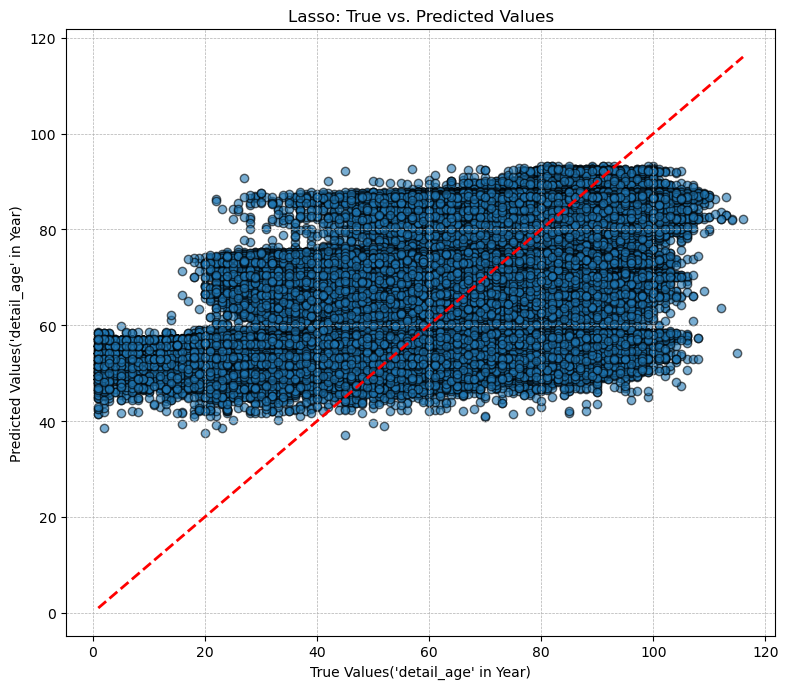

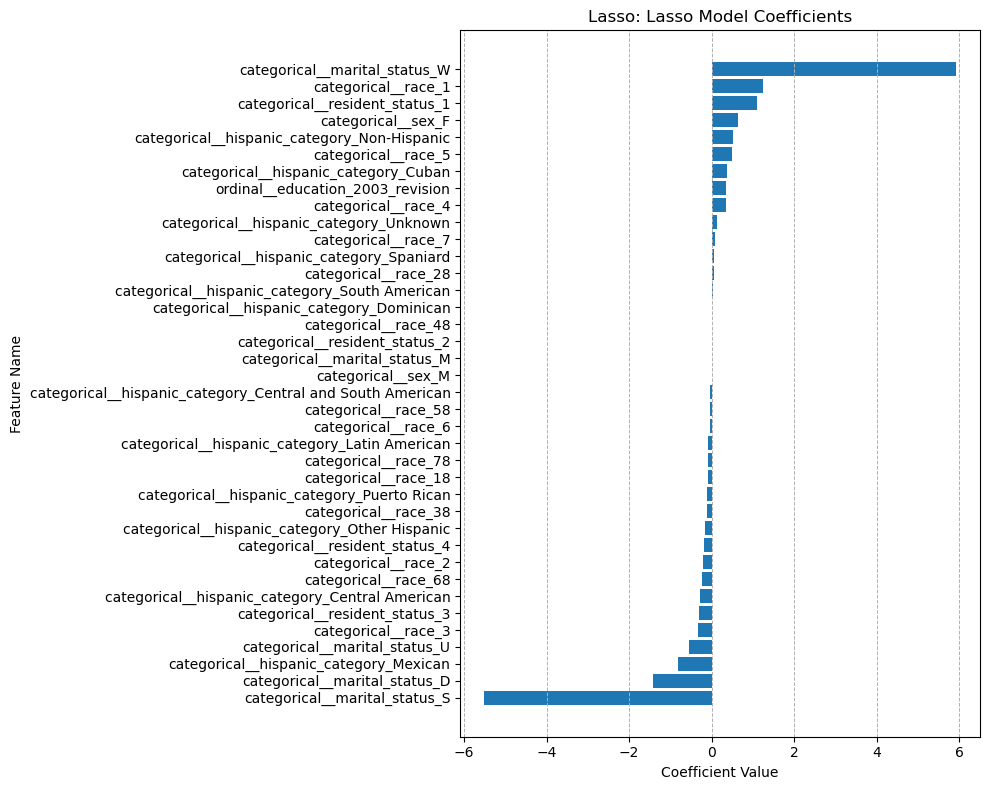

   importances_mean  importances_std             feature_name
2          0.610734         0.001095           marital_status
3          0.017670         0.000262                     race
4          0.012643         0.000106        hispanic_category
0          0.011315         0.000158          resident_status
1          0.002916         0.000071                      sex
5          0.000907         0.000047  education_2003_revision


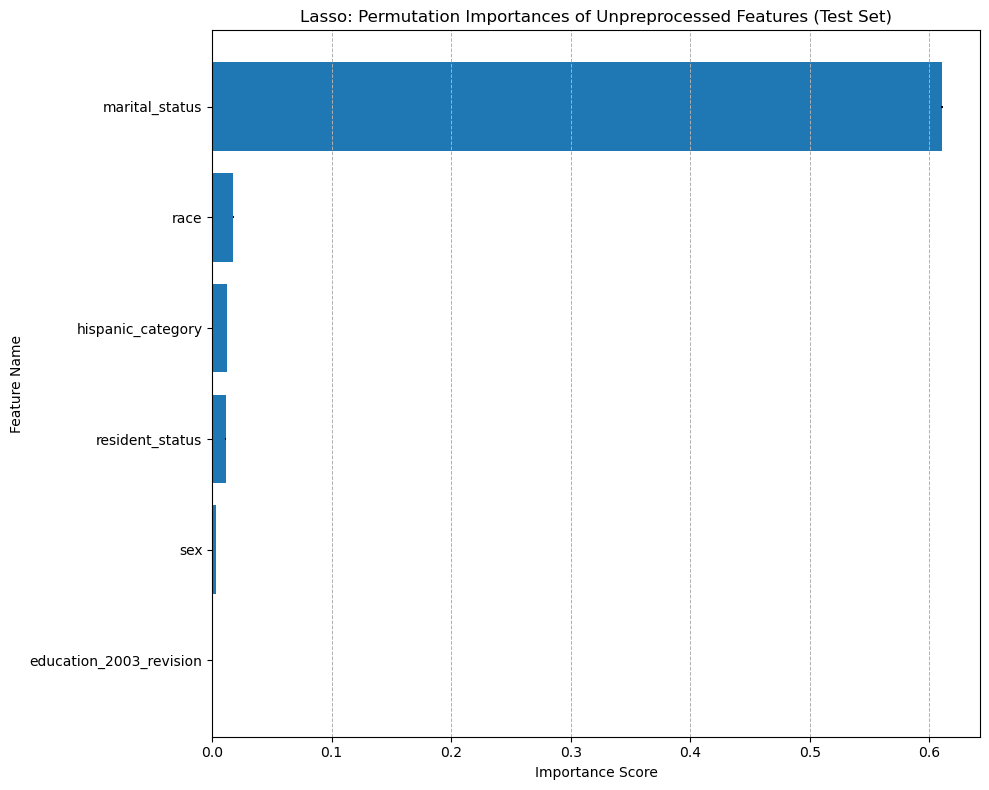

                                         feature_name  importances_mean  \
10                      categorical__marital_status_W      2.424179e-01   
8                       categorical__marital_status_S      2.109708e-01   
6                       categorical__marital_status_D      1.404612e-02   
11                                categorical__race_1      1.037148e-02   
0                      categorical__resident_status_1      8.360153e-03   
30             categorical__hispanic_category_Mexican      4.673902e-03   
4                                  categorical__sex_F      2.870198e-03   
9                       categorical__marital_status_U      2.238242e-03   
31        categorical__hispanic_category_Non-Hispanic      1.920866e-03   
15                                categorical__race_5      1.729310e-03   
27               categorical__hispanic_category_Cuban      9.100788e-04   
37                   ordinal__education_2003_revision      9.087500e-04   
14                       

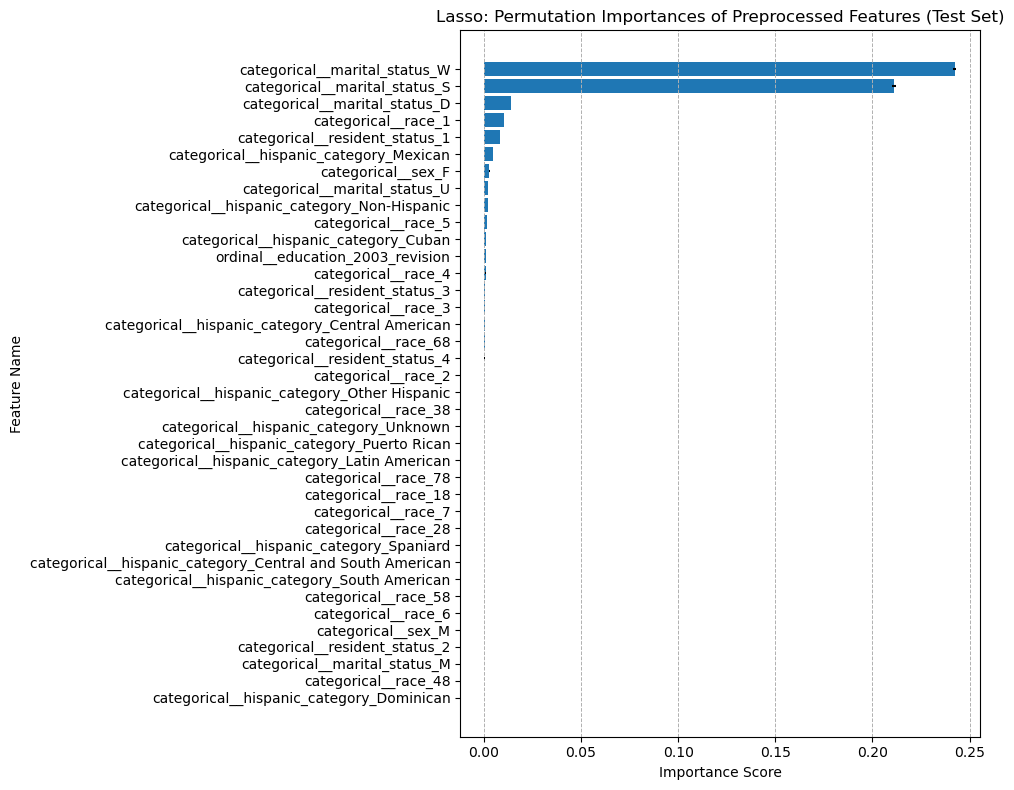

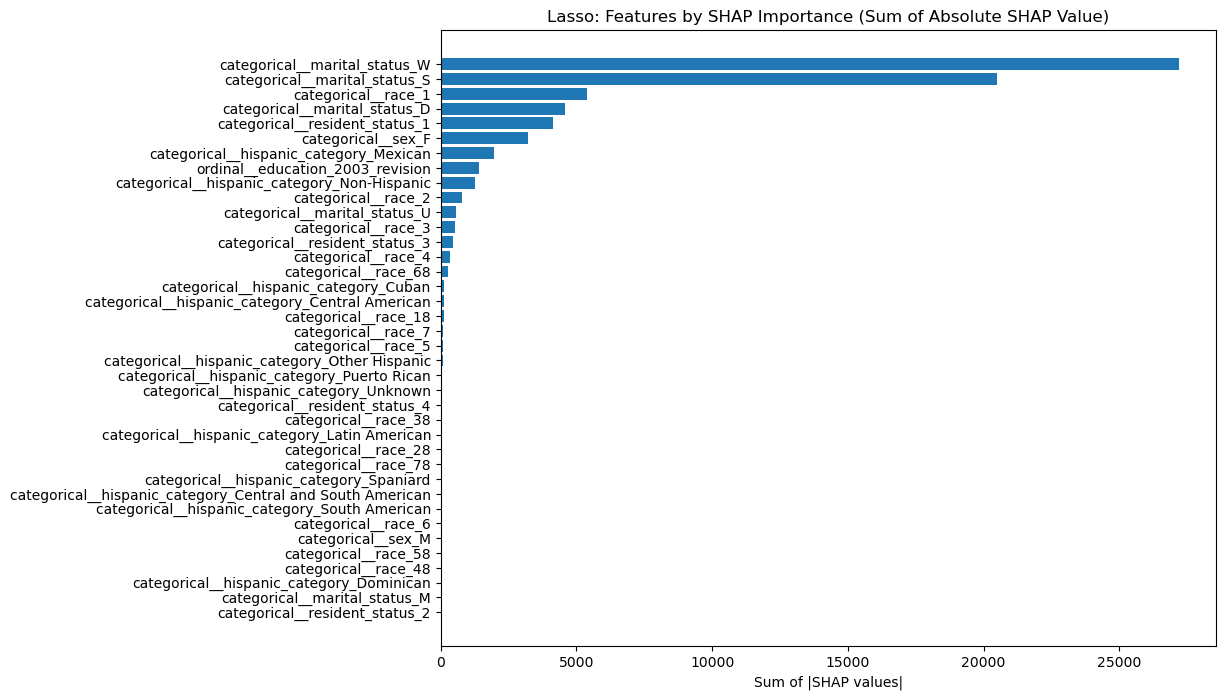

In [ ]:
# Lasso Plots
# Find the index of the best model (lowest RMSE)
best_model_index = np.argmin(lasso_test_rmses)
best_model = lasso_best_models[best_model_index]
best_X_test = lasso_X_test_all[best_model_index]
best_y_test = lasso_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
# Using lasso_y_test_preds_all and lasso_y_test_true_all for the scatter plot
best_y_test_preds = lasso_y_test_preds_all[best_model_index]
best_y_test_true = lasso_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 7))
plt.scatter(best_y_test_true, best_y_test_preds, alpha=0.6, edgecolor='k')
plt.plot([min(best_y_test_true), max(best_y_test_true)], 
         [min(best_y_test_true), max(best_y_test_true)], 'r--', lw=2)  # Perfect prediction line
plt.title("Lasso: True vs. Predicted Values")
plt.xlabel("True Values('detail_age' in Year)")
plt.ylabel("Predicted Values('detail_age' in Year)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/lasso/lasso_true_vs_pred.png', dpi=300, bbox_inches='tight')
plt.show()

# Coefficients
best_lasso_model = best_model.named_steps["lasso"]

# Get the coefficients from the Lasso model
coefficients = best_lasso_model.coef_

# Combine feature names and coefficients into a DataFrame
coefficients_df = pd.DataFrame({
    "feature_name": feature_names,
    "coefficient": coefficients
}).sort_values(by="coefficient", ascending=False)

# Display the coefficients
coefficients_df_sorted = coefficients_df.sort_values(by="coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df_sorted["feature_name"], coefficients_df_sorted["coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Lasso: Lasso Model Coefficients")
plt.grid(axis="x", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('figures/lasso/lasso_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

# Permutation Importance for unpreprocessed data
result = permutation_importance(best_model, best_X_test, best_y_test, n_repeats= 10, n_jobs= -1, random_state=random_states[best_model_index])
permutation_importance_result = pd.DataFrame({"importances_mean": result.importances_mean, "importances_std": result.importances_std, "feature_name": ftrs})
permutation_importance_result = permutation_importance_result.sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Lasso: Permutation Importances of Unpreprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/lasso/lasso_permutation_importance_unprocessed.png', dpi=300, bbox_inches='tight')
plt.show()

preprocessed_X_test = preprocessing_pipeline.transform(best_X_test)

# Permutation Importance for preprocessed data
result = permutation_importance(best_lasso_model, preprocessed_X_test, best_y_test, n_repeats=10, n_jobs=-1)
permutation_importance_result = pd.DataFrame({
    "feature_name": feature_names,
    "importances_mean": result.importances_mean,
    "importances_std": result.importances_std
}).sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Lasso: Permutation Importances of Preprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/lasso/lasso_permutation_importance_processed.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP
# Use only the first 5000 data points
lasso_X_test_subset = lasso_X_test_preprocessed_all[best_model_index][:5000]

# Initialize the SHAP explainer with the subset
explainer = shap.Explainer(best_lasso_model, lasso_X_test_subset)

# Calculate SHAP values for the subset
lasso_shap_values = explainer(lasso_X_test_subset)
lasso_shap_values_array = lasso_shap_values.values

# Compute the global SHAP importance for the subset
lasso_shap_summary = np.sum(np.abs(lasso_shap_values_array), axis=0)
indcs = np.argsort(lasso_shap_summary)

# Sort features by importance
lasso_shap_summary_sorted = lasso_shap_summary[indcs]
lasso_sorted_feature_names = np.array(feature_names)[indcs]

# Plot Global SHAP Importance for the subset
plt.figure(figsize=(10, 8))
plt.barh(lasso_sorted_feature_names, lasso_shap_summary_sorted)
plt.xlabel('Sum of |SHAP values|')
plt.title('Lasso: Features by SHAP Importance (Sum of Absolute SHAP Value)')
plt.savefig('figures/lasso/lasso_shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP summary plot for the subset
shap.summary_plot(lasso_shap_values, lasso_X_test_subset, feature_names=feature_names, plot_size=(10, 8), show=False)
plt.savefig('figures/lasso/lasso_shap_summary.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
import os
#SHAP Forceplot 1 (instance_index = 20)
save_dir = 'figures/lasso'
os.makedirs(save_dir, exist_ok=True)

# Generate the SHAP force plot
instance_index = 20
top_indices = np.argsort(np.abs(lasso_shap_values.values[instance_index]))[-10:]
force_plot = shap.force_plot(
    base_value=lasso_shap_values.base_values[instance_index],
    shap_values=lasso_shap_values.values[instance_index][top_indices],
    features=lasso_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

# Save the force plot as an HTML file (then convert to png for later use)
shap.save_html(f"{save_dir}/lasso_force_plot_instance_20.html", force_plot)

In [84]:
#SHAP Forceplot 1 (instance_index = 20)
instance_index = 20
top_indices = np.argsort(np.abs(lasso_shap_values.values[instance_index]))[-10:]
shap.force_plot(
    base_value=lasso_shap_values.base_values[instance_index],
    shap_values=lasso_shap_values.values[instance_index][top_indices],
    features=lasso_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

In [ ]:
# SHAP FORCEPLOT 2
instance_index = 5
top_indices = np.argsort(np.abs(lasso_shap_values.values[instance_index]))[-10:]
force_plot = shap.force_plot(
    base_value=lasso_shap_values.base_values[instance_index],
    shap_values=lasso_shap_values.values[instance_index][top_indices],
    features=lasso_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)
shap.save_html(f"{save_dir}/lasso_force_plot_instance_5.html", force_plot)

In [82]:
#SHAP Forceplot 2 (instance_index = 5)
instance_index = 5
top_indices = np.argsort(np.abs(lasso_shap_values.values[instance_index]))[-10:]
shap.force_plot(
    base_value=lasso_shap_values.base_values[instance_index],
    shap_values=lasso_shap_values.values[instance_index][top_indices],
    features=lasso_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

# Model 2 : RIDGE (Linear Regression with L2 Regularization)

In [13]:
#--------------------------------------------#
# Model 2 : RIDGE (Linear Regression with L2 Regularization)
#--------------------------------------------#

from sklearn.linear_model import Ridge
model = Ridge(max_iter= 10000)
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
feature_names = None
pipeline = make_pipeline(preprocessor, final_scaler, model)

ridge_test_rmses = []
ridge_best_models = []

ridge_y_test_preds_all = []
ridge_y_test_true_all = []
ridge_X_test_all = []
ridge_X_test_preprocessed_all = []

ridge_baseline_rmses = []

for random_state in random_states:

    #splitting using statified_split
    age_bins = pd.cut(y,bins=[0,20,40,60,80,120],labels=['<20','20-40','40-60','60-80','>80'])
    stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = random_state)
    for train_index, test_index in stratified_split.split(X, age_bins):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #generate copy of X_train and X_test for later use (for explanations)
    X_train_copy = X_train
    X_test_copy = X_test

    preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('final_scaler', final_scaler)])
    preprocessing_pipeline.fit(X_train_copy)

    #get feature names
    if feature_names is None:
        preprocessor.fit(X_train)
        feature_names = preprocessor.get_feature_names_out().tolist()

    rmse_scoring = make_scorer (root_mean_squared_error, greater_is_better = False)

    kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

    grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=rmse_scoring, cv=kf, return_train_score= True, n_jobs = -1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_test_pred = grid.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)

    ridge_best_models.append(best_model)
    ridge_test_rmses.append(test_rmse)
    ridge_y_test_preds_all.append(y_test_pred)
    ridge_y_test_true_all.append(y_test)
    ridge_X_test_all.append(X_test)

    # calculate baseline scores
    y_train_mean = y_train.mean() 
    y_pred_baseline = np.full_like(y_test, fill_value=y_train_mean, dtype=np.float64)
    baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
    ridge_baseline_rmses.append(baseline_rmse)

    df_test = preprocessing_pipeline.transform(X_test_copy)
    ridge_X_test_preprocessed_all.append(df_test)
    
    
ridge_sd_test_rmses = np.std(ridge_test_rmses)
ridge_mean_test_rmses = np.mean(ridge_test_rmses)


In [190]:
#save results using pickle (compressed, file too large for github)
import os
import pickle
import gzip

os.makedirs("results/ridge", exist_ok=True)

objects_to_save = {
    "ridge_test_rmses": ridge_test_rmses,
    "ridge_best_models": ridge_best_models,
    "ridge_y_test_preds_all": ridge_y_test_preds_all,
    "ridge_y_test_true_all": ridge_y_test_true_all,
    "ridge_X_test_all": ridge_X_test_all,
    "ridge_baseline_rmses": ridge_baseline_rmses,
    "ridge_X_test_preprocessed_all": ridge_X_test_preprocessed_all
}

for name, obj in objects_to_save.items():
    file_path = f"results/ridge/{name}.pkl.gz"  
    with gzip.open(file_path, "wb") as f:  
        pickle.dump(obj, f)
    print(f"{name} saved and compressed to {file_path}")

for name in objects_to_save.keys():
    file_path = f"results/ridge/{name}.pkl.gz"
    size = os.path.getsize(file_path) / (1024 * 1024) 
    print(f"{file_path} size: {size:.2f} MB")

ridge_test_rmses saved and compressed to results/ridge/ridge_test_rmses.pkl.gz
ridge_best_models saved and compressed to results/ridge/ridge_best_models.pkl.gz
ridge_y_test_preds_all saved and compressed to results/ridge/ridge_y_test_preds_all.pkl.gz
ridge_y_test_true_all saved and compressed to results/ridge/ridge_y_test_true_all.pkl.gz
ridge_X_test_all saved and compressed to results/ridge/ridge_X_test_all.pkl.gz
ridge_baseline_rmses saved and compressed to results/ridge/ridge_baseline_rmses.pkl.gz
ridge_X_test_preprocessed_all saved and compressed to results/ridge/ridge_X_test_preprocessed_all.pkl.gz
results/ridge/ridge_test_rmses.pkl.gz size: 0.00 MB
results/ridge/ridge_best_models.pkl.gz size: 0.01 MB
results/ridge/ridge_y_test_preds_all.pkl.gz size: 5.19 MB
results/ridge/ridge_y_test_true_all.pkl.gz size: 21.41 MB
results/ridge/ridge_X_test_all.pkl.gz size: 13.28 MB
results/ridge/ridge_baseline_rmses.pkl.gz size: 0.00 MB
results/ridge/ridge_X_test_preprocessed_all.pkl.gz size: 10

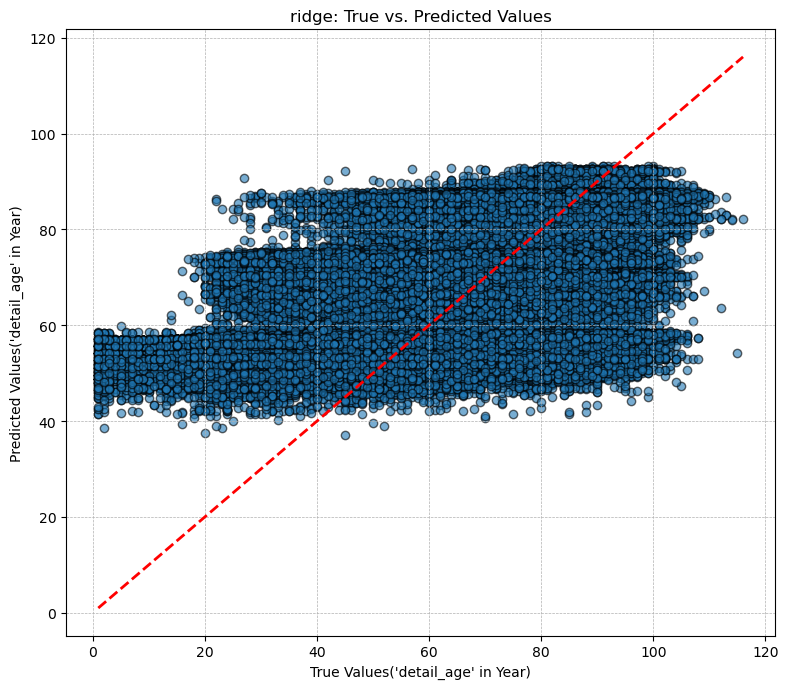

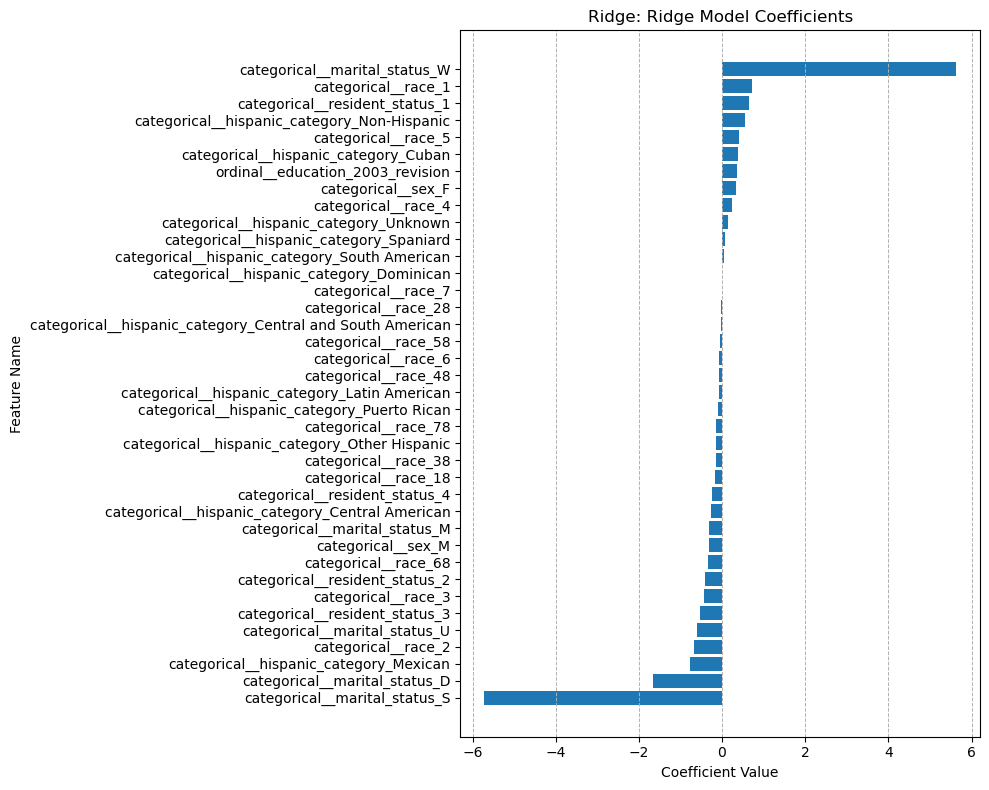

   importances_mean  importances_std             feature_name
2          0.610732         0.001095           marital_status
3          0.017691         0.000262                     race
4          0.012659         0.000106        hispanic_category
0          0.011325         0.000158          resident_status
1          0.002919         0.000071                      sex
5          0.000909         0.000047  education_2003_revision


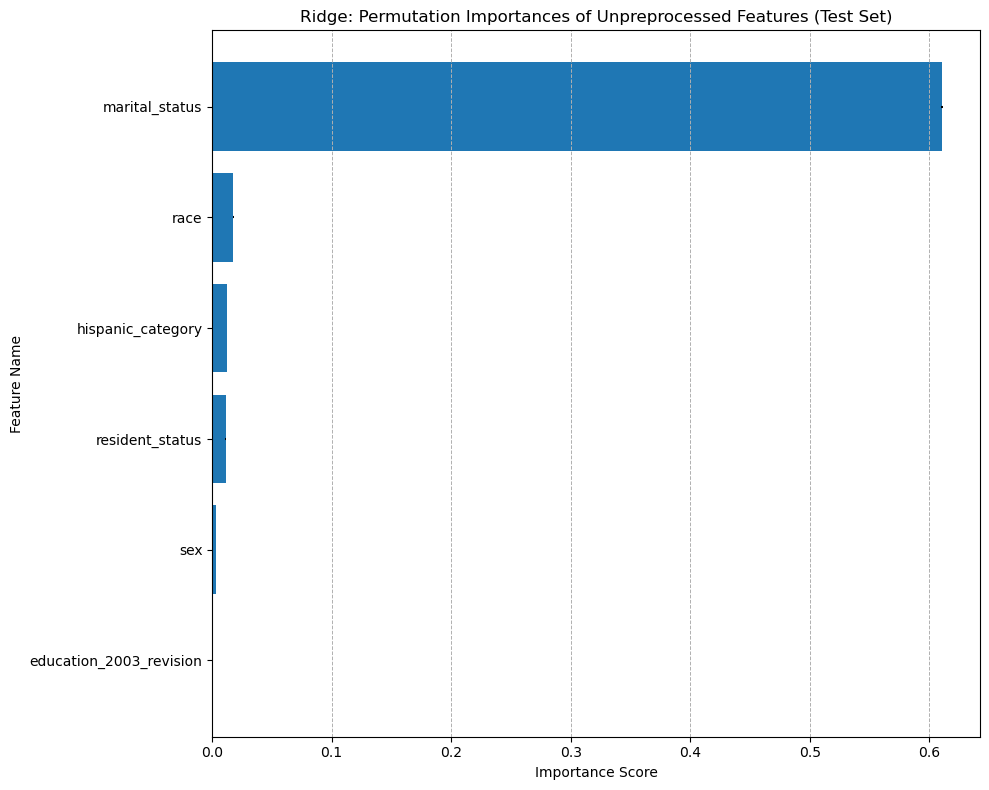

                                         feature_name  importances_mean  \
8                       categorical__marital_status_S      2.266214e-01   
10                      categorical__marital_status_W      2.183414e-01   
6                       categorical__marital_status_D      1.891824e-02   
30             categorical__hispanic_category_Mexican      4.363288e-03   
11                                categorical__race_1      3.494908e-03   
12                                categorical__race_2      3.132494e-03   
0                      categorical__resident_status_1      2.856144e-03   
9                       categorical__marital_status_U      2.674776e-03   
31        categorical__hispanic_category_Non-Hispanic      2.268272e-03   
2                      categorical__resident_status_3      1.935379e-03   
13                                categorical__race_3      1.432965e-03   
15                                categorical__race_5      1.230422e-03   
1                      ca

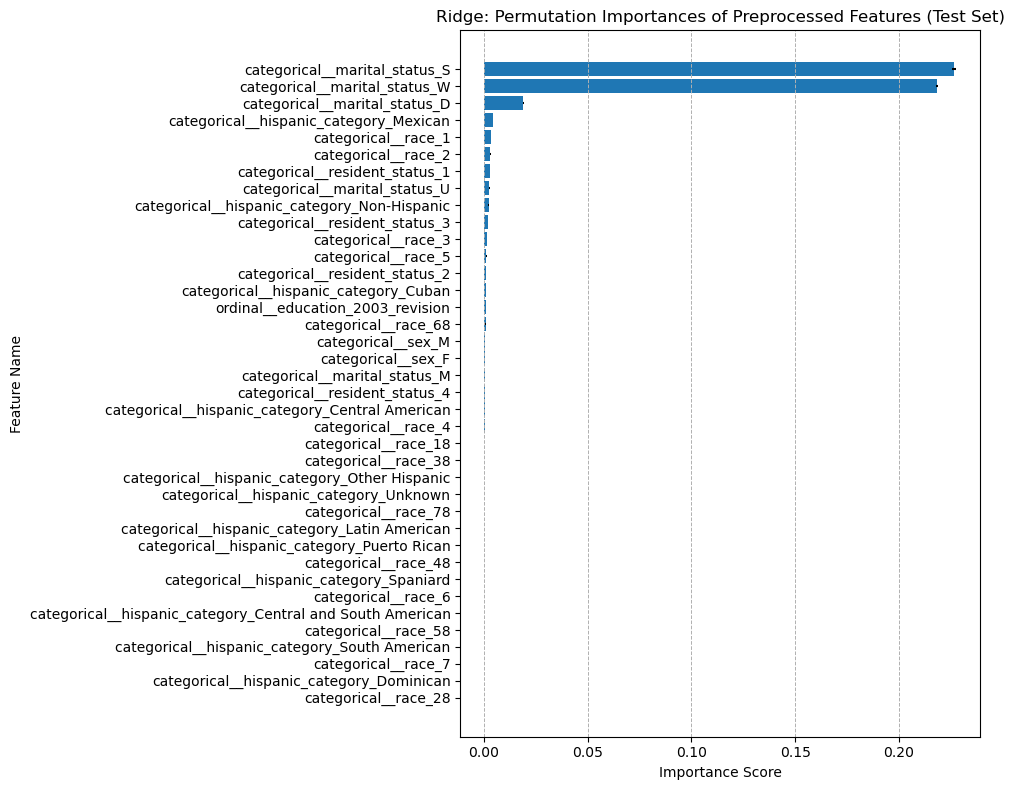

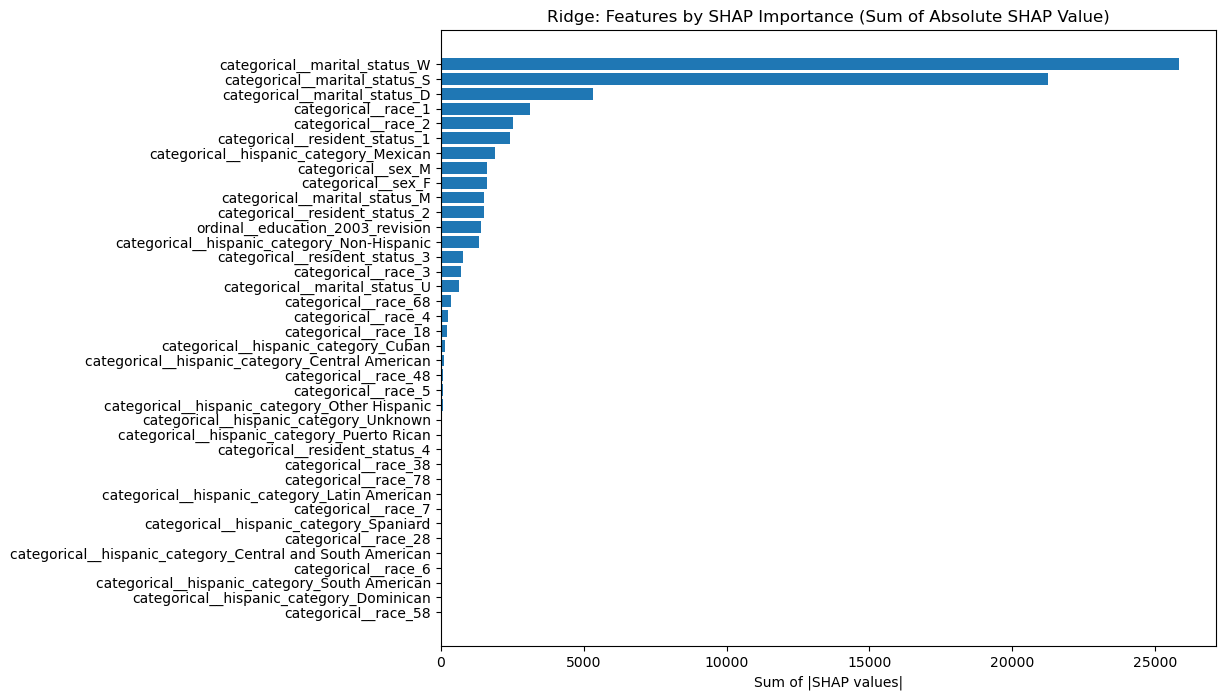

In [ ]:
# Ridge Plots
# Find the index of the best model (lowest RMSE)
best_model_index = np.argmin(ridge_test_rmses)
best_model = ridge_best_models[best_model_index]
best_X_test = ridge_X_test_all[best_model_index]
best_y_test = ridge_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
# Using ridge_y_test_preds_all and ridge_y_test_true_all for the scatter plot
best_y_test_preds = ridge_y_test_preds_all[best_model_index]
best_y_test_true = ridge_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 7))
plt.scatter(best_y_test_true, best_y_test_preds, alpha=0.6, edgecolor='k')
plt.plot([min(best_y_test_true), max(best_y_test_true)], 
         [min(best_y_test_true), max(best_y_test_true)], 'r--', lw=2) 
plt.title("ridge: True vs. Predicted Values")
plt.xlabel("True Values('detail_age' in Year)")
plt.ylabel("Predicted Values('detail_age' in Year)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/ridge/ridge_true_vs_pred.png', dpi=300, bbox_inches='tight')
plt.show()


# Coefficients
best_ridge_model = best_model.named_steps["ridge"]

# Get the coefficients from the ridge model
coefficients = best_ridge_model.coef_

# Combine feature names and coefficients into a DataFrame
coefficients_df = pd.DataFrame({
    "feature_name": feature_names,
    "coefficient": coefficients
}).sort_values(by="coefficient", ascending=False)

# Display the coefficients

coefficients_df_sorted = coefficients_df.sort_values(by="coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df_sorted["feature_name"], coefficients_df_sorted["coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Ridge: Ridge Model Coefficients")
plt.grid(axis="x", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('figures/ridge/ridge_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

# Permutation Importance for unpreprocessed data
result = permutation_importance(best_model, best_X_test, best_y_test, n_repeats= 10, n_jobs= -1, random_state=random_states[best_model_index])
permutation_importance_result = pd.DataFrame({"importances_mean": result.importances_mean, "importances_std": result.importances_std, "feature_name": ftrs})
permutation_importance_result = permutation_importance_result.sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Ridge: Permutation Importances of Unpreprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/ridge/ridge_permutation_importance_unprocessed.png', dpi=300, bbox_inches='tight')
plt.show()


preprocessed_X_test = preprocessing_pipeline.transform(best_X_test)

# Permutation Importance for preprocessed data
result = permutation_importance(best_ridge_model, preprocessed_X_test, best_y_test, n_repeats=10, n_jobs=-1)
permutation_importance_result = pd.DataFrame({
    "feature_name": feature_names,
    "importances_mean": result.importances_mean,
    "importances_std": result.importances_std
}).sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Ridge: Permutation Importances of Preprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/ridge/ridge_permutation_importance_processed.png', dpi=300, bbox_inches='tight')
plt.show()


# SHAP
# Use only the first 5000 data points
ridge_X_test_subset = ridge_X_test_preprocessed_all[best_model_index][:5000]

# Initialize the SHAP explainer with the subset
explainer = shap.Explainer(best_ridge_model, ridge_X_test_subset)

# Calculate SHAP values for the subset
ridge_shap_values = explainer(ridge_X_test_subset)
ridge_shap_values_array = ridge_shap_values.values

# Compute the global SHAP importance for the subset
ridge_shap_summary = np.sum(np.abs(ridge_shap_values_array), axis=0)
indcs = np.argsort(ridge_shap_summary)

# Sort features by importance
ridge_shap_summary_sorted = ridge_shap_summary[indcs]
ridge_sorted_feature_names = np.array(feature_names)[indcs]

# Plot Global SHAP Importance for the subset
plt.figure(figsize=(10, 8))
plt.barh(ridge_sorted_feature_names, ridge_shap_summary_sorted)
plt.xlabel('Sum of |SHAP values|')
plt.title('Ridge: Features by SHAP Importance (Sum of Absolute SHAP Value)')
plt.savefig('figures/ridge/ridge_shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP summary plot for the subset
shap.summary_plot(ridge_shap_values, ridge_X_test_subset, feature_names=feature_names, plot_size=(10, 8), show=False)
plt.savefig('figures/ridge/ridge_shap_summary.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
import os
#SHAP Forceplot 1 (instance_index = 20)
# Set up the directory for saving
save_dir = 'figures/ridge'
os.makedirs(save_dir, exist_ok=True)

# Generate the SHAP force plot
instance_index = 20
top_indices = np.argsort(np.abs(ridge_shap_values.values[instance_index]))[-15:]
force_plot = shap.force_plot(
    base_value=ridge_shap_values.base_values[instance_index],
    shap_values=ridge_shap_values.values[instance_index][top_indices],
    features=ridge_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

# Save the force plot as an HTML file
shap.save_html(f"{save_dir}/ridge_force_plot_instance_20.html", force_plot)

In [94]:
#SHAP Forceplot 1 (instance_index = 20)
instance_index = 20
top_indices = np.argsort(np.abs(ridge_shap_values.values[instance_index]))[-15:]
shap.force_plot(
    base_value=ridge_shap_values.base_values[instance_index],
    shap_values=ridge_shap_values.values[instance_index][top_indices],
    features=ridge_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

In [ ]:
#SHAP Forceplot 2 (instance_index = 22)
instance_index = 22
top_indices = np.argsort(np.abs(ridge_shap_values.values[instance_index]))[-15:]
force_plot = shap.force_plot(
    base_value=ridge_shap_values.base_values[instance_index],
    shap_values=ridge_shap_values.values[instance_index][top_indices],
    features=ridge_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

# Save the force plot as an HTML file
shap.save_html(f"{save_dir}/ridge_force_plot_instance_.html", force_plot)

In [96]:
#SHAP Forceplot 2 (instance_index = 22)
instance_index = 22
top_indices = np.argsort(np.abs(ridge_shap_values.values[instance_index]))[-15:]
shap.force_plot(
    base_value=ridge_shap_values.base_values[instance_index],
    shap_values=ridge_shap_values.values[instance_index][top_indices],
    features=ridge_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

# Model 3 : Elastic Net (Linear Regression with a combination of L1+L2 Regularization)

In [ ]:
#--------------------------------------------#
# Model 3 : Elastic Net (Linear Regression with a combination of L1+L2 Regularization)
#--------------------------------------------#

from sklearn.linear_model import ElasticNet
model = ElasticNet(max_iter= 10000)
param_grid = {'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'elasticnet__l1_ratio': [0.01, 0.25, 0.5, 0.75, 1]} 
feature_names = None
pipeline = make_pipeline(preprocessor, final_scaler, model)

elasticnet_test_rmses = []
elasticnet_best_models = []

elasticnet_y_test_preds_all = []
elasticnet_y_test_true_all = []
elasticnet_X_test_all = []
elasticnet_X_test_preprocessed_all = []

elasticnet_baseline_rmses = []

for random_state in random_states:

    #splitting using statified_split
    age_bins = pd.cut(y,bins=[0,20,40,60,80,120],labels=['<20','20-40','40-60','60-80','>80'])
    stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = random_state)
    for train_index, test_index in stratified_split.split(X, age_bins):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #generate copy of X_train and X_test for later use (for explanations)
    X_train_copy = X_train
    X_test_copy = X_test

    preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('final_scaler', final_scaler)])
    preprocessing_pipeline.fit(X_train_copy)

    #get feature names
    if feature_names is None:
        preprocessor.fit(X_train)
        feature_names = preprocessor.get_feature_names_out().tolist()

    rmse_scoring = make_scorer (root_mean_squared_error, greater_is_better = False)

    kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

    grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=rmse_scoring, cv=kf, return_train_score= True, n_jobs = -1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_test_pred = grid.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)

    elasticnet_best_models.append(best_model)
    elasticnet_test_rmses.append(test_rmse)
    elasticnet_y_test_preds_all.append(y_test_pred)
    elasticnet_y_test_true_all.append(y_test)
    elasticnet_X_test_all.append(X_test)

    # calculate baseline scores
    y_train_mean = y_train.mean() 
    y_pred_baseline = np.full_like(y_test, fill_value=y_train_mean, dtype=np.float64)
    baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
    elasticnet_baseline_rmses.append(baseline_rmse)

    df_test = preprocessing_pipeline.transform(X_test_copy)
    elasticnet_X_test_preprocessed_all.append(df_test)
    
elasticnet_sd_test_rmses = np.std(elasticnet_test_rmses)
elasticnet_mean_test_rmses = np.mean(elasticnet_test_rmses)

In [ ]:
#save results using pickle (compressed, file too large for github)
import os
import pickle
import gzip

os.makedirs("results/elasticnet", exist_ok=True)

objects_to_save = {
    "elasticnet_test_rmses": elasticnet_test_rmses,
    "elasticnet_best_models": elasticnet_best_models,
    "elasticnet_y_test_preds_all": elasticnet_y_test_preds_all,
    "elasticnet_y_test_true_all": elasticnet_y_test_true_all,
    "elasticnet_X_test_all": elasticnet_X_test_all,
    "elasticnet_baseline_rmses": elasticnet_baseline_rmses,
    "elasticnet_X_test_preprocessed_all": elasticnet_X_test_preprocessed_all
}

for name, obj in objects_to_save.items():
    file_path = f"results/elasticnet/{name}.pkl.gz"  
    with gzip.open(file_path, "wb") as f:  
        pickle.dump(obj, f)
    print(f"{name} saved and compressed to {file_path}")

for name in objects_to_save.keys():
    file_path = f"results/elasticnet/{name}.pkl.gz"
    size = os.path.getsize(file_path) / (1024 * 1024) 
    print(f"{file_path} size: {size:.2f} MB")

elasticnet_test_rmses saved and compressed to results/elasticnet/elasticnet_test_rmses.pkl.gz
elasticnet_best_models saved and compressed to results/elasticnet/elasticnet_best_models.pkl.gz
elasticnet_y_test_preds_all saved and compressed to results/elasticnet/elasticnet_y_test_preds_all.pkl.gz
elasticnet_y_test_true_all saved and compressed to results/elasticnet/elasticnet_y_test_true_all.pkl.gz
elasticnet_X_test_all saved and compressed to results/elasticnet/elasticnet_X_test_all.pkl.gz
elasticnet_baseline_rmses saved and compressed to results/elasticnet/elasticnet_baseline_rmses.pkl.gz
elasticnet_X_test_preprocessed_all saved and compressed to results/elasticnet/elasticnet_X_test_preprocessed_all.pkl.gz
results/elasticnet/elasticnet_test_rmses.pkl.gz size: 0.00 MB
results/elasticnet/elasticnet_best_models.pkl.gz size: 0.01 MB
results/elasticnet/elasticnet_y_test_preds_all.pkl.gz size: 5.20 MB
results/elasticnet/elasticnet_y_test_true_all.pkl.gz size: 21.41 MB
results/elasticnet/elas

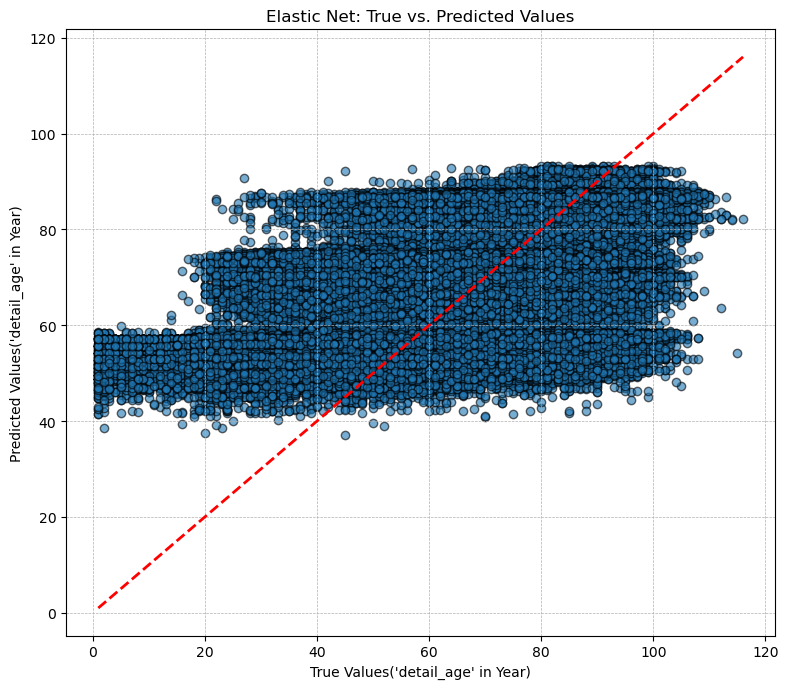

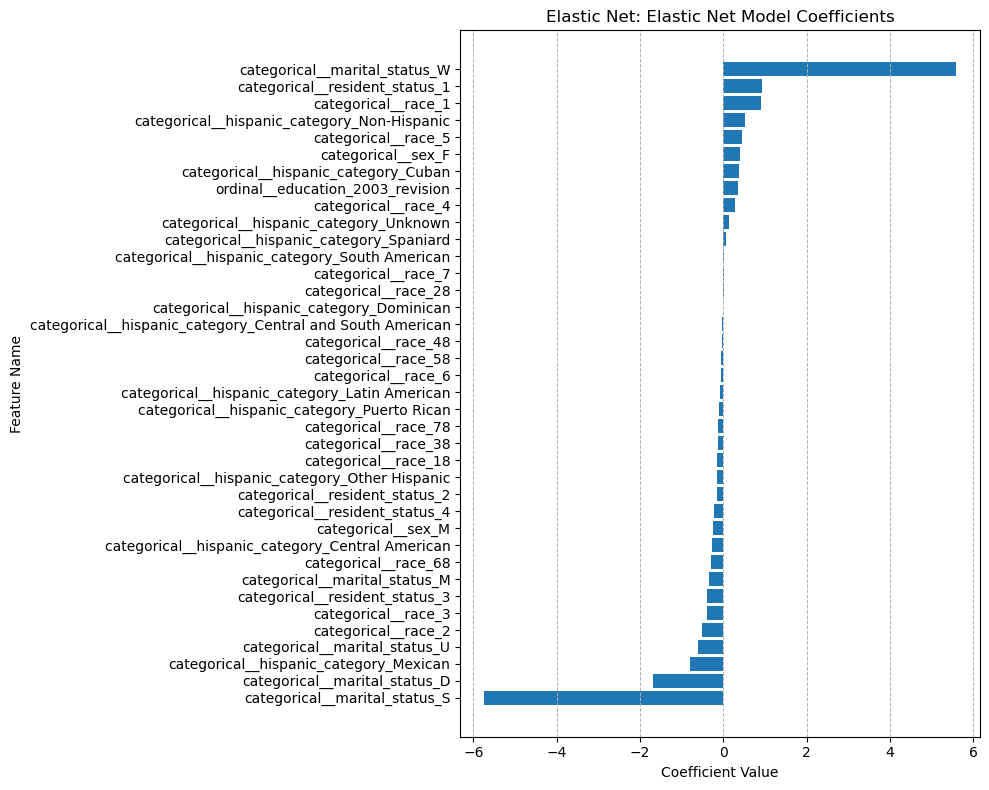

   importances_mean  importances_std             feature_name
2          0.610484         0.001095           marital_status
3          0.017685         0.000262                     race
4          0.012652         0.000106        hispanic_category
0          0.011318         0.000158          resident_status
1          0.002926         0.000071                      sex
5          0.000906         0.000047  education_2003_revision


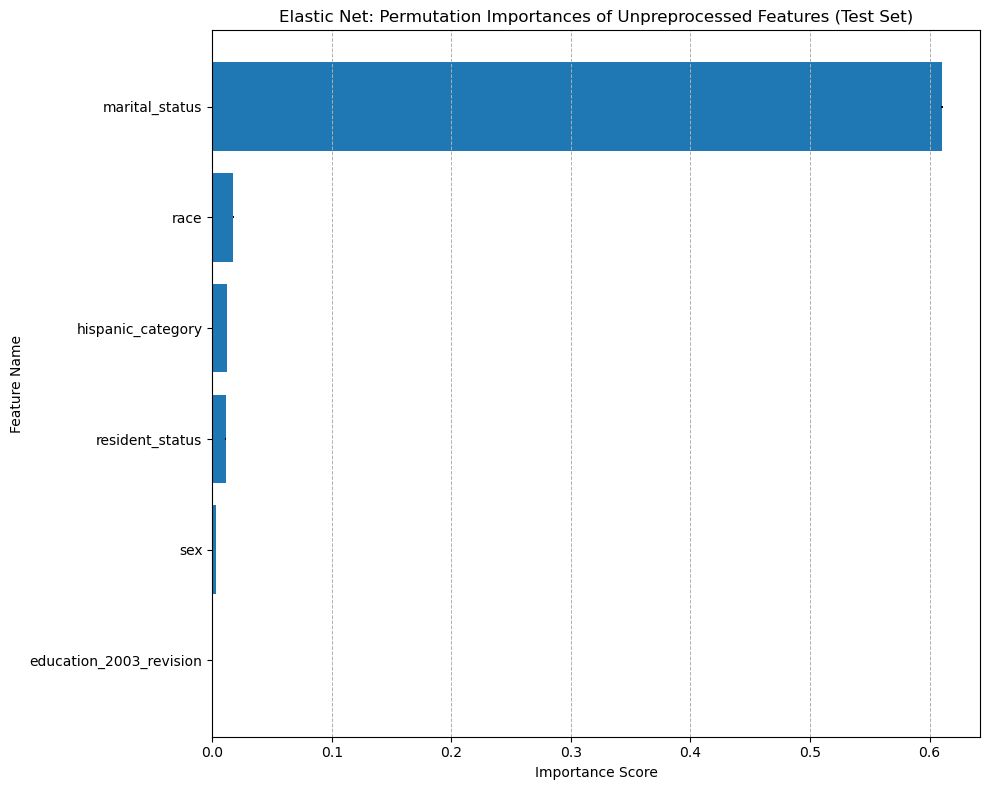

                                         feature_name  importances_mean  \
8                       categorical__marital_status_S          0.228641   
10                      categorical__marital_status_W          0.215711   
6                       categorical__marital_status_D          0.019553   
0                      categorical__resident_status_1          0.005914   
11                                categorical__race_1          0.005569   
30             categorical__hispanic_category_Mexican          0.004702   
9                       categorical__marital_status_U          0.002689   
31        categorical__hispanic_category_Non-Hispanic          0.001957   
12                                categorical__race_2          0.001770   
15                                categorical__race_5          0.001382   
13                                categorical__race_3          0.001206   
4                                  categorical__sex_F          0.001093   
2                      ca

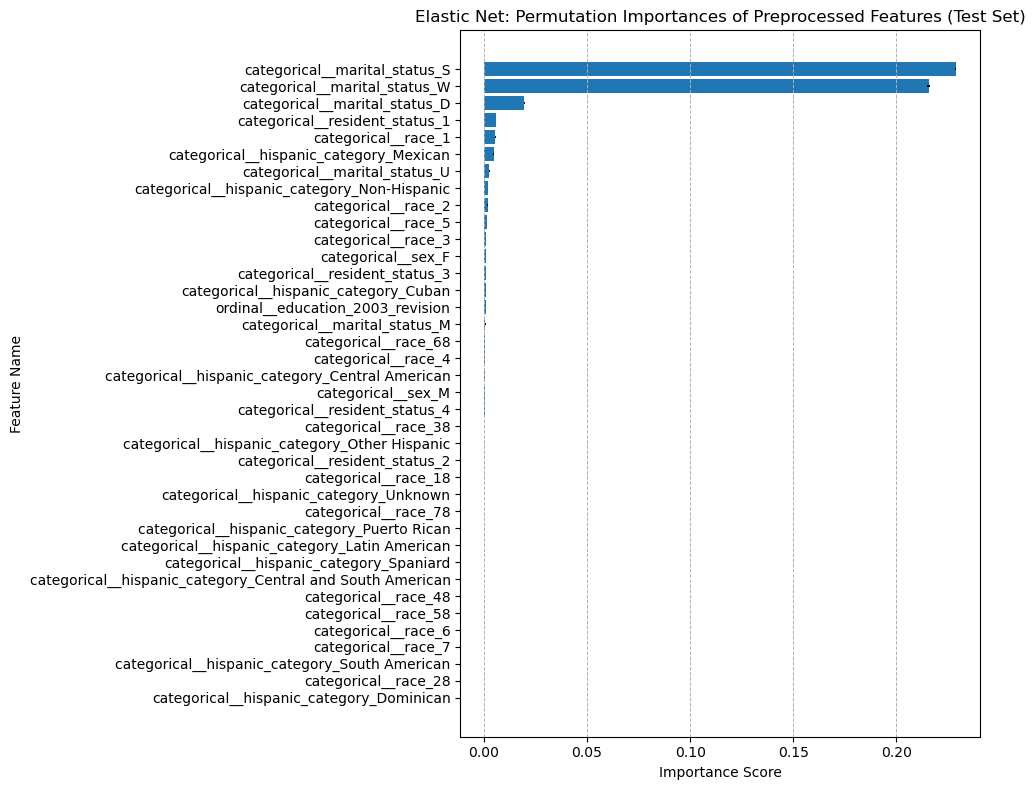

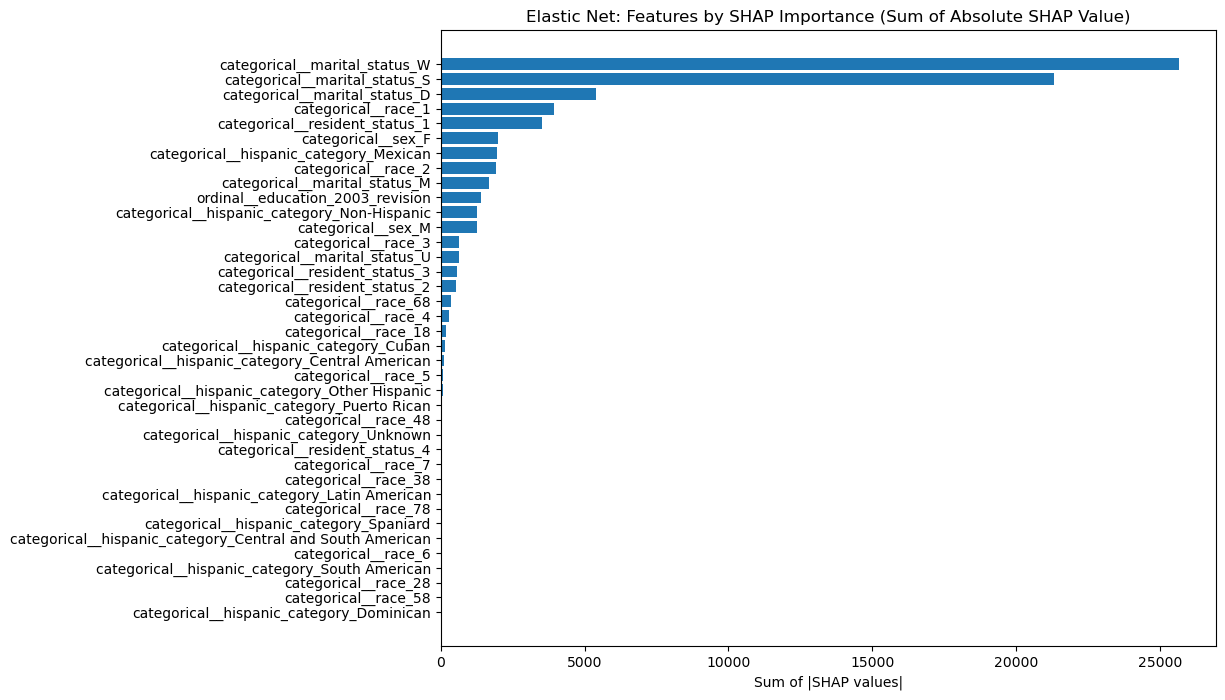

In [ ]:
# elasticnet Plots
# Find the index of the best model (lowest RMSE)
best_model_index = np.argmin(elasticnet_test_rmses)
best_model = elasticnet_best_models[best_model_index]
best_X_test = elasticnet_X_test_all[best_model_index]
best_y_test = elasticnet_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
# Using elasticnet_y_test_preds_all and elasticnet_y_test_true_all for the scatter plot
best_y_test_preds = elasticnet_y_test_preds_all[best_model_index]
best_y_test_true = elasticnet_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 7))
plt.scatter(best_y_test_true, best_y_test_preds, alpha=0.6, edgecolor='k')
plt.plot([min(best_y_test_true), max(best_y_test_true)], 
         [min(best_y_test_true), max(best_y_test_true)], 'r--', lw=2)
plt.title("Elastic Net: True vs. Predicted Values")
plt.xlabel("True Values('detail_age' in Year)")
plt.ylabel("Predicted Values('detail_age' in Year)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/elasticnet/elasticnet_true_vs_pred.png', dpi=300, bbox_inches='tight')
plt.show()

# Coefficients
best_elasticnet_model = best_model.named_steps["elasticnet"]

# Get the coefficients from the elasticnet model
coefficients = best_elasticnet_model.coef_

# Combine feature names and coefficients into a DataFrame
coefficients_df = pd.DataFrame({
    "feature_name": feature_names,
    "coefficient": coefficients
}).sort_values(by="coefficient", ascending=False)

# Display the coefficients

coefficients_df_sorted = coefficients_df.sort_values(by="coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df_sorted["feature_name"], coefficients_df_sorted["coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Elastic Net: Elastic Net Model Coefficients")
plt.grid(axis="x", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('figures/elasticnet/elasticnet_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

# Permutation Importance for unpreprocessed data
result = permutation_importance(best_model, best_X_test, best_y_test, n_repeats= 10, n_jobs= -1, random_state=random_states[best_model_index])
permutation_importance_result = pd.DataFrame({"importances_mean": result.importances_mean, "importances_std": result.importances_std, "feature_name": ftrs})
permutation_importance_result = permutation_importance_result.sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Elastic Net: Permutation Importances of Unpreprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/elasticnet/elasticnet_permutation_importance_unprocessed.png', dpi=300, bbox_inches='tight')
plt.show()

preprocessed_X_test = preprocessing_pipeline.transform(best_X_test)

# Permutation Importance for preprocessed data
result = permutation_importance(best_elasticnet_model, preprocessed_X_test, best_y_test, n_repeats=10, n_jobs=-1)
permutation_importance_result = pd.DataFrame({
    "feature_name": feature_names,
    "importances_mean": result.importances_mean,
    "importances_std": result.importances_std
}).sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Elastic Net: Permutation Importances of Preprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/elasticnet/elasticnet_permutation_importance_processed.png', dpi=300, bbox_inches='tight')
plt.show()


# SHAP
# Use only the first 5000 data points
elasticnet_X_test_subset = elasticnet_X_test_preprocessed_all[best_model_index][:5000]

# Initialize the SHAP explainer with the subset
explainer = shap.Explainer(best_elasticnet_model, elasticnet_X_test_subset)

# Calculate SHAP values for the subset
elasticnet_shap_values = explainer(elasticnet_X_test_subset)
elasticnet_shap_values_array = elasticnet_shap_values.values

# Compute the global SHAP importance for the subset
elasticnet_shap_summary = np.sum(np.abs(elasticnet_shap_values_array), axis=0)
indcs = np.argsort(elasticnet_shap_summary)

# Sort features by importance
elasticnet_shap_summary_sorted = elasticnet_shap_summary[indcs]
elasticnet_sorted_feature_names = np.array(feature_names)[indcs]

# Plot Global SHAP Importance for the subset
plt.figure(figsize=(10, 8))
plt.barh(elasticnet_sorted_feature_names, elasticnet_shap_summary_sorted)
plt.xlabel('Sum of |SHAP values|')
plt.title('Elastic Net: Features by SHAP Importance (Sum of Absolute SHAP Value)')
#plt.savefig('/Users/zhouwenjun/Desktop/DATA1030 Final Project Plots/elasticnet/elasticnet_shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/elasticnet/elasticnet_shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP summary plot for the subset
shap.summary_plot(elasticnet_shap_values, elasticnet_X_test_subset, feature_names=feature_names, plot_size=(10, 8), show=False)
plt.savefig('figures/elasticnet/elasticnet_shap_summary.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
#SHAP Forceplot 1 (instance_index = 20)
# Set up the directory for saving
save_dir = 'figures/elasticnet'
os.makedirs(save_dir, exist_ok=True)

# Generate the SHAP force plot
instance_index = 20
top_indices = np.argsort(np.abs(elasticnet_shap_values.values[instance_index]))[-15:]
force_plot = shap.force_plot(
    base_value=elasticnet_shap_values.base_values[instance_index],
    shap_values=elasticnet_shap_values.values[instance_index][top_indices],
    features=elasticnet_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)
shap.save_html(f"{save_dir}/elasticnet_force_plot_instance_20.html", force_plot)

In [101]:
#SHAP Forceplot 1 (instance_index = 20)
instance_index = 20
top_indices = np.argsort(np.abs(elasticnet_shap_values.values[instance_index]))[-15:]
shap.force_plot(
    base_value=elasticnet_shap_values.base_values[instance_index],
    shap_values=elasticnet_shap_values.values[instance_index][top_indices],
    features=elasticnet_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

In [ ]:
#SHAP Forceplot 2 (instance_index = 5)
instance_index = 5
top_indices = np.argsort(np.abs(elasticnet_shap_values.values[instance_index]))[-15:]
force_plot = shap.force_plot(
    base_value=elasticnet_shap_values.base_values[instance_index],
    shap_values=elasticnet_shap_values.values[instance_index][top_indices],
    features=elasticnet_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)
shap.save_html(f"{save_dir}/elasticnet_force_plot_instance_5.html", force_plot)

In [105]:
#SHAP Forceplot 2 (instance_index = 5)
instance_index = 5
top_indices = np.argsort(np.abs(elasticnet_shap_values.values[instance_index]))[-15:]
shap.force_plot(
    base_value=elasticnet_shap_values.base_values[instance_index],
    shap_values=elasticnet_shap_values.values[instance_index][top_indices],
    features=elasticnet_X_test_subset[instance_index, top_indices],
    feature_names=np.array(feature_names)[top_indices]
)

# Model 4 : Random Forest Regression

In [ ]:
#--------------------------------------------#
# Model 4 : Random Forest Regression
#--------------------------------------------#

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
param_grid = {'randomforestregressor__max_depth': [1, 5, 9, 12, 20, 50],
              'randomforestregressor__max_features': np.linspace(0.1, 1, num=5)} 
feature_names = None
pipeline = make_pipeline(preprocessor, final_scaler, model)

randomforest_test_rmses = []
randomforest_best_models = []

randomforest_y_test_preds_all = []
randomforest_y_test_true_all = []
randomforest_X_test_all = []
randomforest_X_test_preprocessed_all = []

randomforest_baseline_rmses = []

for random_state in random_states:

    #splitting using statified_split
    age_bins = pd.cut(y,bins=[0,20,40,60,80,120],labels=['<20','20-40','40-60','60-80','>80'])
    stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = random_state)
    for train_index, test_index in stratified_split.split(X, age_bins):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #generate copy of X_train and X_test for later use (for explanations)
    X_train_copy = X_train
    X_test_copy = X_test

    preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('final_scaler', final_scaler)])
    preprocessing_pipeline.fit(X_train_copy)

    #get feature names
    if feature_names is None:
        preprocessor.fit(X_train)
        feature_names = preprocessor.get_feature_names_out().tolist()

    rmse_scoring = make_scorer (root_mean_squared_error, greater_is_better = False)

    kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

    grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=rmse_scoring, cv=kf, return_train_score= True, n_jobs = -1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_test_pred = grid.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)

    randomforest_best_models.append(best_model)
    randomforest_test_rmses.append(test_rmse)
    randomforest_y_test_preds_all.append(y_test_pred)
    randomforest_y_test_true_all.append(y_test)
    randomforest_X_test_all.append(X_test)

    # calculate baseline scores
    y_train_mean = y_train.mean() 
    y_pred_baseline = np.full_like(y_test, fill_value=y_train_mean, dtype=np.float64)
    baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
    randomforest_baseline_rmses.append(baseline_rmse)

    df_test = preprocessing_pipeline.transform(X_test_copy)
    randomforest_X_test_preprocessed_all.append(df_test)
    
randomforest_sd_test_rmses = np.std(randomforest_test_rmses)
randomforest_mean_test_rmses = np.mean(randomforest_test_rmses)

In [187]:
#save results using pickle (compressed, file too large for github)
import os
import pickle
import gzip

os.makedirs("results/randomforest", exist_ok=True)

objects_to_save = {
    "randomforest_test_rmses": randomforest_test_rmses,
    "randomforest_best_models": randomforest_best_models,
    "randomforest_y_test_preds_all": randomforest_y_test_preds_all,
    "randomforest_y_test_true_all": randomforest_y_test_true_all,
    "randomforest_X_test_all": randomforest_X_test_all,
    "randomforest_baseline_rmses": randomforest_baseline_rmses,
    "randomforest_X_test_preprocessed_all": randomforest_X_test_preprocessed_all
}

for name, obj in objects_to_save.items():
    file_path = f"results/randomforest/{name}.pkl.gz"  
    with gzip.open(file_path, "wb") as f:  
        pickle.dump(obj, f)
    print(f"{name} saved and compressed to {file_path}")

for name in objects_to_save.keys():
    file_path = f"results/randomforest/{name}.pkl.gz"
    size = os.path.getsize(file_path) / (1024 * 1024) 
    print(f"{file_path} size: {size:.2f} MB")

randomforest_test_rmses saved and compressed to results/randomforest/randomforest_test_rmses.pkl.gz
randomforest_best_models saved and compressed to results/randomforest/randomforest_best_models.pkl.gz
randomforest_y_test_preds_all saved and compressed to results/randomforest/randomforest_y_test_preds_all.pkl.gz
randomforest_y_test_true_all saved and compressed to results/randomforest/randomforest_y_test_true_all.pkl.gz
randomforest_X_test_all saved and compressed to results/randomforest/randomforest_X_test_all.pkl.gz
randomforest_baseline_rmses saved and compressed to results/randomforest/randomforest_baseline_rmses.pkl.gz
randomforest_X_test_preprocessed_all saved and compressed to results/randomforest/randomforest_X_test_preprocessed_all.pkl.gz
results/randomforest/randomforest_test_rmses.pkl.gz size: 0.00 MB
results/randomforest/randomforest_best_models.pkl.gz size: 29.96 MB
results/randomforest/randomforest_y_test_preds_all.pkl.gz size: 5.18 MB
results/randomforest/randomforest_y_

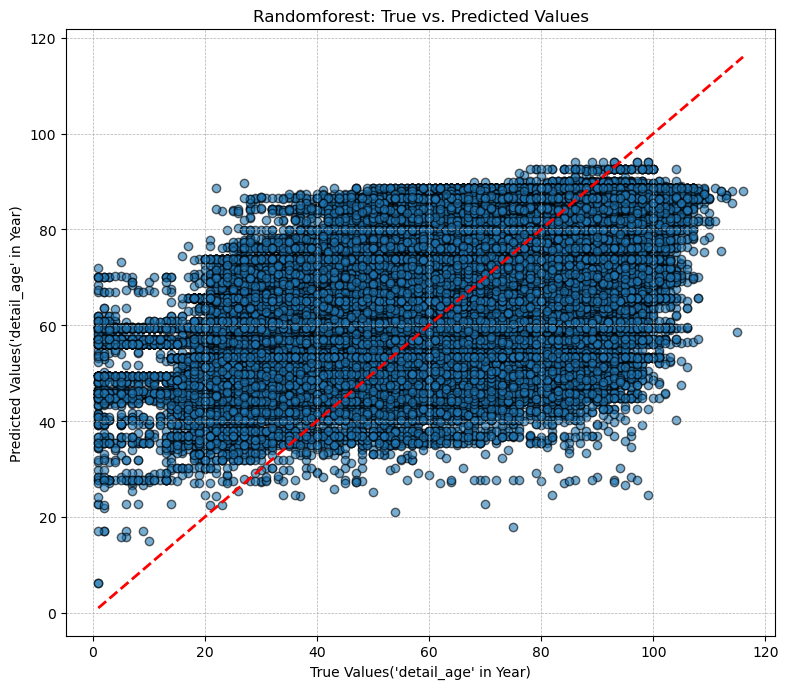

   importances_mean  importances_std             feature_name
2          0.629273         0.001143           marital_status
5          0.045378         0.000415  education_2003_revision
1          0.033852         0.000338                      sex
3          0.026171         0.000233                     race
4          0.020294         0.000198        hispanic_category
0          0.015432         0.000257          resident_status


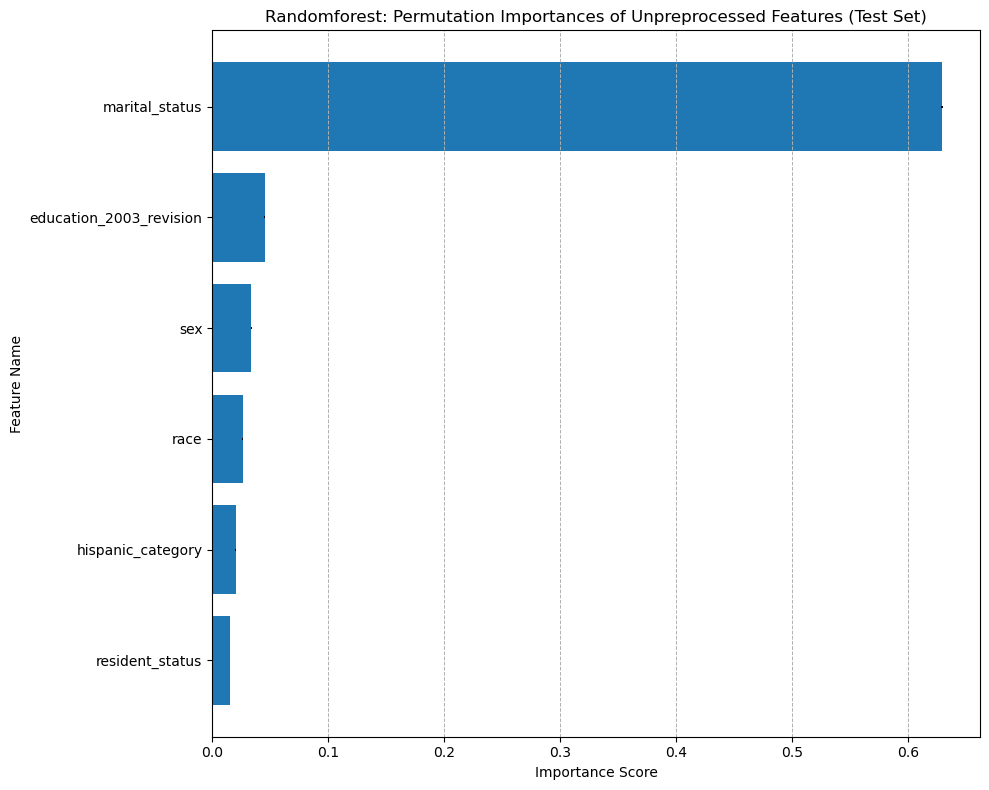

                                         feature_name  importance
10                      categorical__marital_status_W    0.535166
8                       categorical__marital_status_S    0.256468
37                   ordinal__education_2003_revision    0.056417
7                       categorical__marital_status_M    0.036009
5                                  categorical__sex_M    0.019879
4                                  categorical__sex_F    0.017784
0                      categorical__resident_status_1    0.014736
11                                categorical__race_1    0.011724
6                       categorical__marital_status_D    0.011346
30             categorical__hispanic_category_Mexican    0.008684
12                                categorical__race_2    0.008684
31        categorical__hispanic_category_Non-Hispanic    0.007255
15                                categorical__race_5    0.002450
1                      categorical__resident_status_2    0.002112
27        

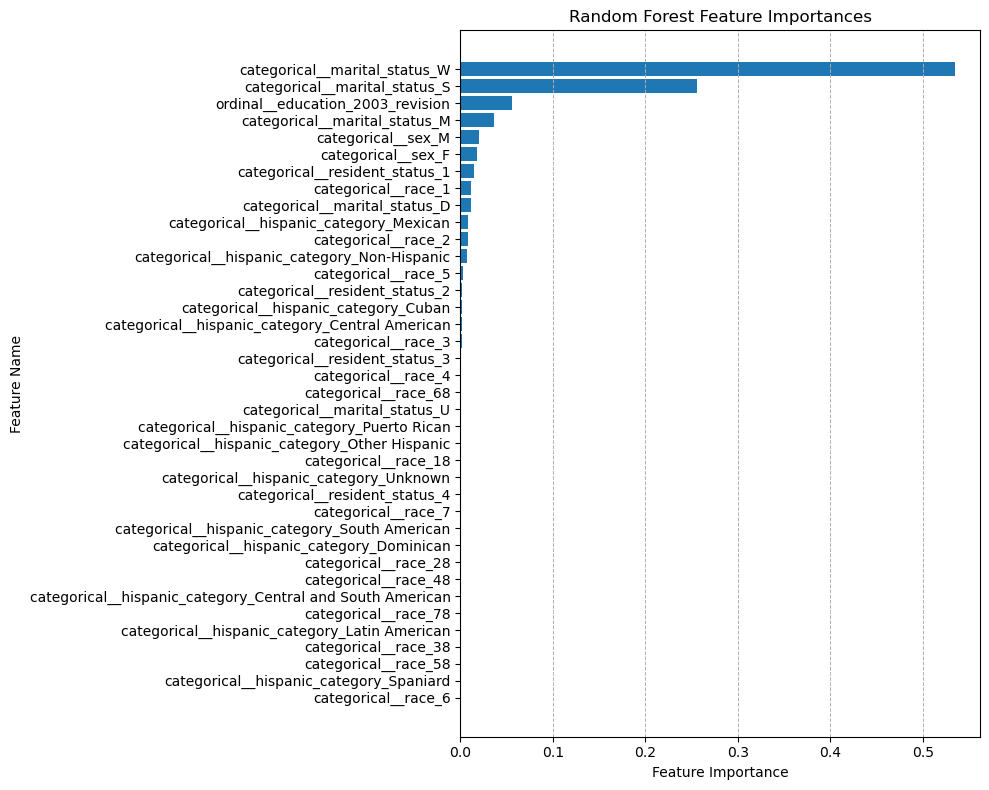

                                         feature_name  importances_mean  \
10                      categorical__marital_status_W          0.393028   
8                       categorical__marital_status_S          0.125679   
37                   ordinal__education_2003_revision          0.045546   
7                       categorical__marital_status_M          0.031490   
0                      categorical__resident_status_1          0.020946   
11                                categorical__race_1          0.013046   
5                                  categorical__sex_M          0.008526   
4                                  categorical__sex_F          0.008422   
30             categorical__hispanic_category_Mexican          0.006810   
12                                categorical__race_2          0.006614   
31        categorical__hispanic_category_Non-Hispanic          0.006483   
1                      categorical__resident_status_2          0.002708   
6                       c

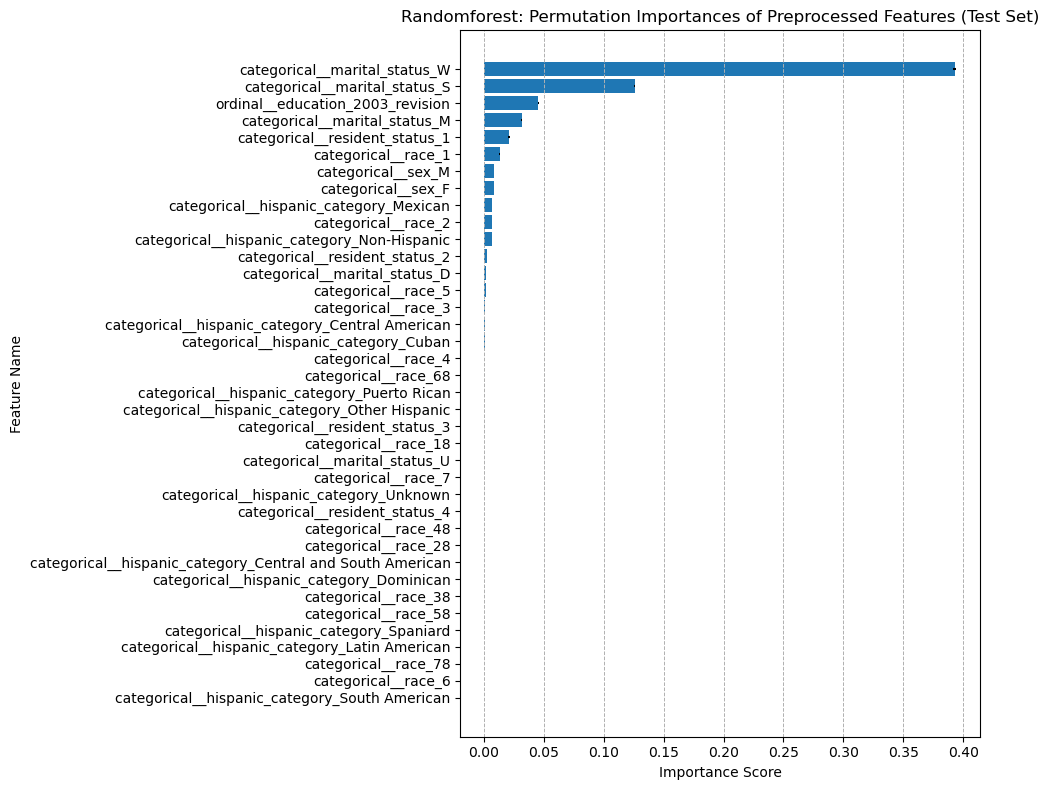

In [ ]:
# Random Forest Plots
# Find the index of the best model (lowest RMSE)
best_model_index = np.argmin(randomforest_test_rmses)
best_model = randomforest_best_models[best_model_index]
best_X_test = randomforest_X_test_all[best_model_index]
best_y_test = randomforest_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
# Using randomforest_y_test_preds_all and randomforest_y_test_true_all for the scatter plot
best_y_test_preds = randomforest_y_test_preds_all[best_model_index]
best_y_test_true = randomforest_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 7))
plt.scatter(best_y_test_true, best_y_test_preds, alpha=0.6, edgecolor='k')
plt.plot([min(best_y_test_true), max(best_y_test_true)], 
         [min(best_y_test_true), max(best_y_test_true)], 'r--', lw=2) 
plt.title("Randomforest: True vs. Predicted Values")
plt.xlabel("True Values('detail_age' in Year)")
plt.ylabel("Predicted Values('detail_age' in Year)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/randomforest/randomforest_true_vs_pred.png', dpi=300, bbox_inches='tight')
plt.show()


# Permutation Importance for unpreprocessed data
result = permutation_importance(best_model, best_X_test, best_y_test, n_repeats= 10, n_jobs= -1, random_state=random_states[best_model_index])
permutation_importance_result = pd.DataFrame({"importances_mean": result.importances_mean, "importances_std": result.importances_std, "feature_name": ftrs})
permutation_importance_result = permutation_importance_result.sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Randomforest: Permutation Importances of Unpreprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/randomforest/randomforest_permutation_importance_unprocessed.png', dpi=300, bbox_inches='tight')
plt.show()

best_randomforest_model = best_model.named_steps["randomforestregressor"]

feature_importances = best_randomforest_model.feature_importances_

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({
    "feature_name": feature_names,
    "importance": feature_importances
}).sort_values(by="importance", ascending=False)

# Print and visualize feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df["feature_name"], importance_df["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importances")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('figures/randomforest/randomforest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

preprocessed_X_test = preprocessing_pipeline.transform(best_X_test)

# Permutation Importance for preprocessed data
result = permutation_importance(best_randomforest_model, preprocessed_X_test, best_y_test, n_repeats=10, n_jobs=-1)
permutation_importance_result = pd.DataFrame({
    "feature_name": feature_names,
    "importances_mean": result.importances_mean,
    "importances_std": result.importances_std
}).sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("Randomforest: Permutation Importances of Preprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/randomforest/randomforest_permutation_importance_preprocessed.png', dpi=300, bbox_inches='tight')
plt.show()


 99%|===================| 4933/5000 [01:08<00:00]        

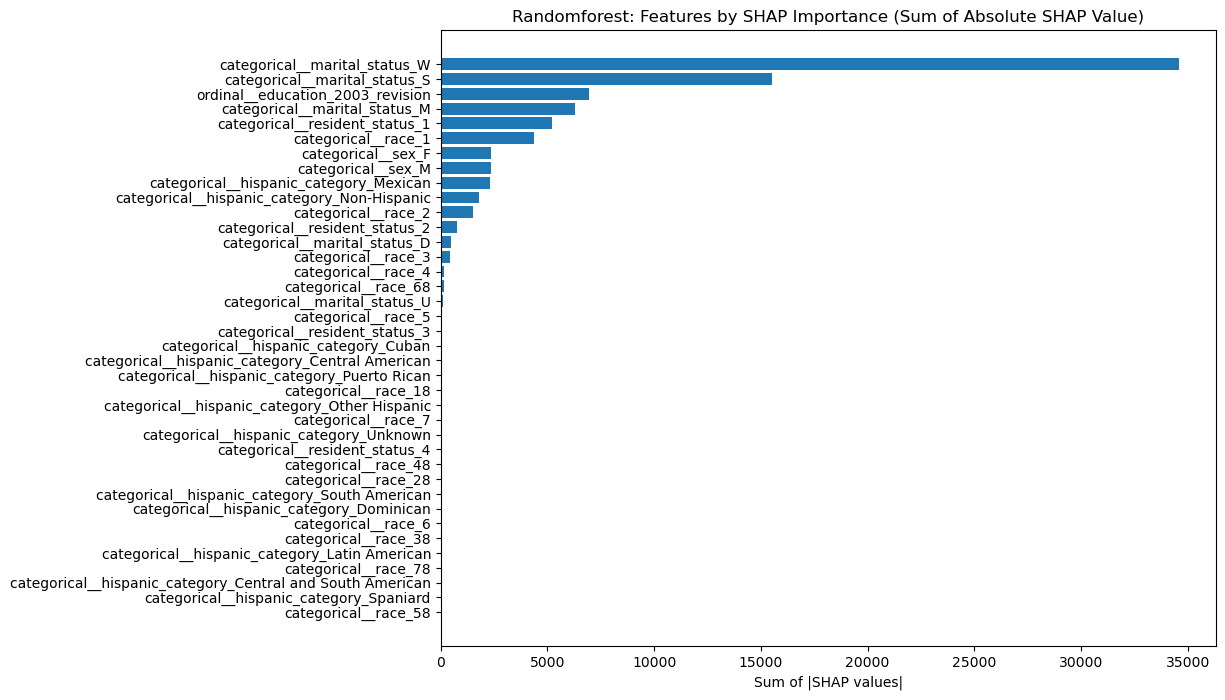

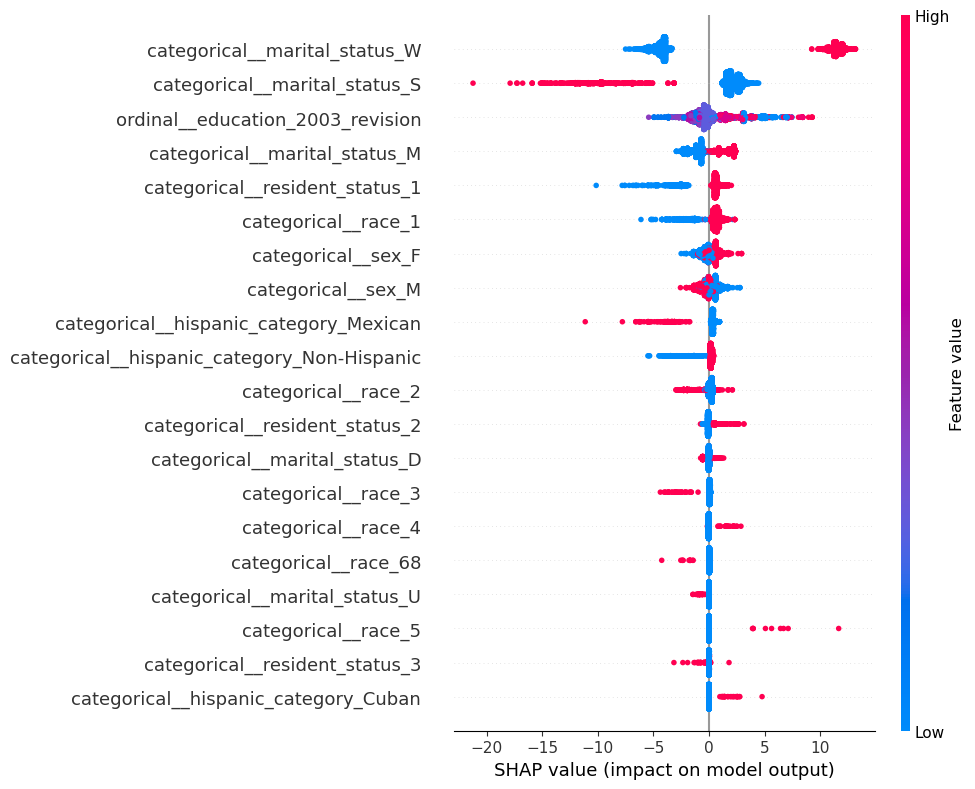

In [ ]:
# SHAP
# Use only the first 5000 data points
randomforest_X_test_subset = randomforest_X_test_preprocessed_all[best_model_index][:5000]

best_randomforest_model.set_params(n_jobs=-1)

# Initialize the SHAP explainer with the subset
explainer = shap.Explainer(best_randomforest_model, randomforest_X_test_subset)

# Calculate SHAP values for the subset
randomforest_shap_values = explainer(randomforest_X_test_subset)
randomforest_shap_values_array = randomforest_shap_values.values

# Compute the global SHAP importance for the subset
randomforest_shap_summary = np.sum(np.abs(randomforest_shap_values_array), axis=0)
indcs = np.argsort(randomforest_shap_summary)

# Sort features by importance
randomforest_shap_summary_sorted = randomforest_shap_summary[indcs]
randomforest_sorted_feature_names = np.array(feature_names)[indcs]

# Plot Global SHAP Importance for the subset
plt.figure(figsize=(10, 8))
plt.barh(randomforest_sorted_feature_names, randomforest_shap_summary_sorted)
plt.xlabel('Sum of |SHAP values|')
plt.title('Randomforest: Features by SHAP Importance (Sum of Absolute SHAP Value)')
plt.savefig('figures/randomforest/randomforest_shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()


# SHAP summary plot for the subset
shap.summary_plot(randomforest_shap_values, randomforest_X_test_subset, feature_names=feature_names, plot_size=(10, 8), show= False)
plt.savefig('figures/randomforest/randomforest_shap_summary.png', dpi=300, bbox_inches='tight')



In [ ]:
#SHAP Forceplot 1 (instance_index = 20)
# Set up the directory for saving
save_dir = 'figures/randomforest'
os.makedirs(save_dir, exist_ok=True)

# Generate the SHAP force plot
instance_index = 20
force_plot = shap.force_plot(
    base_value=randomforest_shap_values.base_values[instance_index], 
    shap_values=randomforest_shap_values.values[instance_index], 
    features=randomforest_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names)

# Save the force plot as an HTML file
shap.save_html(f"{save_dir}/randomforest_force_plot_instance_20.html", force_plot)

In [108]:
#SHAP forceplot 1 (index = 200)
instance_index = 20

# Generate the force plot using the Explanation object
shap.force_plot(
    base_value=randomforest_shap_values.base_values[instance_index], 
    shap_values=randomforest_shap_values.values[instance_index], 
    features=randomforest_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names)

In [157]:
# Generate the SHAP force plot
instance_index = 30
force_plot = shap.force_plot(
    base_value=randomforest_shap_values.base_values[instance_index], 
    shap_values=randomforest_shap_values.values[instance_index], 
    features=randomforest_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names)


# Save the force plot as an HTML file
shap.save_html(f"{save_dir}/randomforest_force_plot_instance_30.html", force_plot)

In [110]:
#SHAP forceplot 2 (index = 30)
instance_index = 30

# Generate the force plot using the Explanation object
shap.force_plot(
    base_value=randomforest_shap_values.base_values[instance_index], 
    shap_values=randomforest_shap_values.values[instance_index], 
    features=randomforest_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names)

# Model 5 : XGBoost Regression

In [239]:
#--------------------------------------------#
# Model 5 : XGBoost Regression with 3-Fold Validation
#--------------------------------------------#
import xgboost
from sklearn.model_selection import KFold

param_grid = {
    "learning_rate": [0.03],
    "subsample": [0.6, 0.8],
    "max_depth": [10, 20, 30, 50]
}

feature_names = None
pipeline = make_pipeline(preprocessor, final_scaler, model)

xgb_test_rmses = []
xgb_best_models = []
xgb_y_test_preds_all = []
xgb_y_test_true_all = []
xgb_X_test_all = []
xgb_X_test_preprocessed_all = []
xgb_baseline_rmses = []

for random_state in random_states:

    age_bins = pd.cut(y, bins=[0, 20, 40, 60, 80, 120], labels=['<20', '20-40', '40-60', '60-80', '>80'])
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)

    for train_index, temp_index in stratified_split.split(X, age_bins):
        X_train_val, X_test = X.iloc[train_index], X.iloc[temp_index]
        y_train_val, y_test = y.iloc[train_index], y.iloc[temp_index]

    X_test_copy = X_test

    preprocessing_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('final_scaler', final_scaler)
    ])
    preprocessing_pipeline.fit(X_train_val)

    if feature_names is None:
        preprocessor.fit(X_train_val)
        feature_names = preprocessor.get_feature_names_out().tolist()

    X_test = preprocessing_pipeline.transform(X_test)

    # 3-Fold Validation
    kf = KFold(n_splits=3, shuffle=True, random_state=random_state)
    best_model = None
    best_rmse = float('inf')
    best_params = None

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Preprocess the splits
        X_train = preprocessing_pipeline.transform(X_train)
        X_val = preprocessing_pipeline.transform(X_val)

        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                for subsample in param_grid['subsample']:
                    XGB = xgboost.XGBRegressor(
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        subsample=subsample,
                        early_stopping_rounds=30
                    )
                    model = XGB
                    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
                    val_predictions = model.predict(X_val)
                    val_rmse = root_mean_squared_error(y_val, val_predictions)

                    if val_rmse < best_rmse:  # Minimize RMSE
                        best_rmse = val_rmse
                        best_model = model
                        best_params = {
                            "learning_rate": learning_rate,
                            "subsample": subsample,
                            "max_depth": max_depth
                        }

    y_test_pred = best_model.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)

    # Append results
    xgb_best_models.append(best_model)
    xgb_test_rmses.append(test_rmse)
    xgb_y_test_preds_all.append(y_test_pred)
    xgb_y_test_true_all.append(y_test)
    xgb_X_test_all.append(X_test)

    y_train_mean = y_train_val.mean()
    y_pred_baseline = np.full_like(y_test, fill_value=y_train_mean, dtype=np.float64)
    baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
    xgb_baseline_rmses.append(baseline_rmse)

    df_test = preprocessing_pipeline.transform(X_test_copy)
    xgb_X_test_preprocessed_all.append(df_test)

xgb_sd_test_rmses = np.std(xgb_test_rmses)
xgb_mean_test_rmses = np.mean(xgb_test_rmses)

print(f"Mean Test RMSE: {xgb_mean_test_rmses}, Std Test RMSE: {xgb_sd_test_rmses}")


Mean Test RMSE: 13.250956644338455, Std Test RMSE: 0.010913203873509828


In [ ]:
#save results using pickle (compressed, file too large for github)
import os
import pickle
import gzip

os.makedirs("results/xgb", exist_ok=True)

objects_to_save = {
    "xgb_test_rmses": xgb_test_rmses,
    "xgb_best_models": xgb_best_models,
    "xgb_y_test_preds_all": xgb_y_test_preds_all,
    "xgb_y_test_true_all": xgb_y_test_true_all,
    "xgb_X_test_all": xgb_X_test_all,
    "xgb_baseline_rmses": xgb_baseline_rmses,
    "xgb_X_test_preprocessed_all": xgb_X_test_preprocessed_all
}

for name, obj in objects_to_save.items():
    file_path = f"results/xgb/{name}.pkl.gz"  
    with gzip.open(file_path, "wb") as f:  
        pickle.dump(obj, f)
    print(f"{name} saved and compressed to {file_path}")

for name in objects_to_save.keys():
    file_path = f"results/xgb/{name}.pkl.gz"
    size = os.path.getsize(file_path) / (1024 * 1024) 
    print(f"{file_path} size: {size:.2f} MB")

xgb_test_rmses saved and compressed to results/xgb/xgb_test_rmses.pkl.gz
xgb_best_models saved and compressed to results/xgb/xgb_best_models.pkl.gz
xgb_y_test_preds_all saved and compressed to results/xgb/xgb_y_test_preds_all.pkl.gz
xgb_y_test_true_all saved and compressed to results/xgb/xgb_y_test_true_all.pkl.gz
xgb_X_test_all saved and compressed to results/xgb/xgb_X_test_all.pkl.gz
xgb_baseline_rmses saved and compressed to results/xgb/xgb_baseline_rmses.pkl.gz
xgb_X_test_preprocessed_all saved and compressed to results/xgb/xgb_X_test_preprocessed_all.pkl.gz
results/xgb/xgb_test_rmses.pkl.gz size: 0.00 MB
results/xgb/xgb_best_models.pkl.gz size: 7.34 MB
results/xgb/xgb_y_test_preds_all.pkl.gz size: 3.98 MB
results/xgb/xgb_y_test_true_all.pkl.gz size: 21.41 MB
results/xgb/xgb_X_test_all.pkl.gz size: 0.00 MB
results/xgb/xgb_baseline_rmses.pkl.gz size: 0.00 MB
results/xgb/xgb_X_test_preprocessed_all.pkl.gz size: 10.10 MB


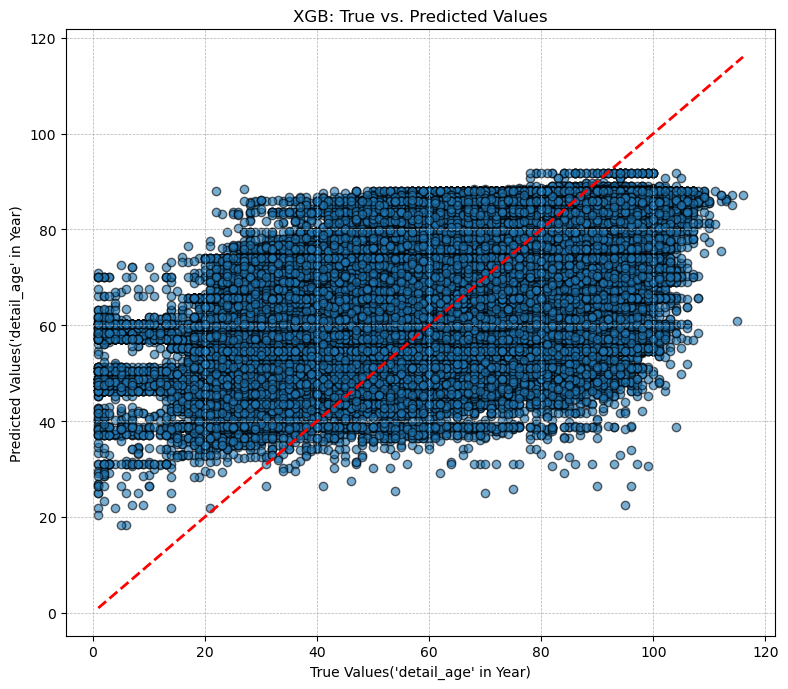

    importances_mean  importances_std  \
10          0.464552         0.001057   
8           0.121002         0.000641   
7           0.044833         0.000322   
37          0.043054         0.000372   
4           0.032798         0.000322   
0           0.019422         0.000223   
11          0.014395         0.000177   
31          0.007390         0.000106   
30          0.005063         0.000137   
12          0.004378         0.000115   
6           0.001967         0.000059   
1           0.001650         0.000072   
15          0.001474         0.000048   
27          0.000628         0.000030   
13          0.000573         0.000029   
25          0.000528         0.000014   
23          0.000467         0.000034   
14          0.000459         0.000022   
33          0.000257         0.000016   
2           0.000231         0.000015   
18          0.000193         0.000027   
36          0.000152         0.000008   
32          0.000142         0.000017   
17          0.00

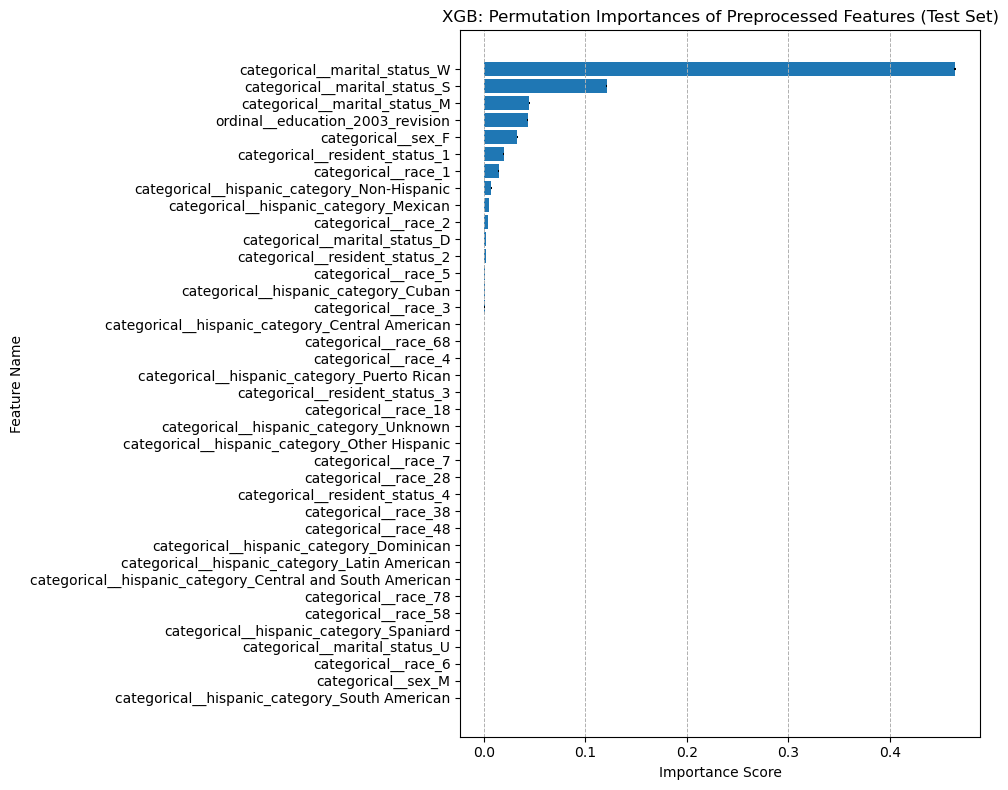

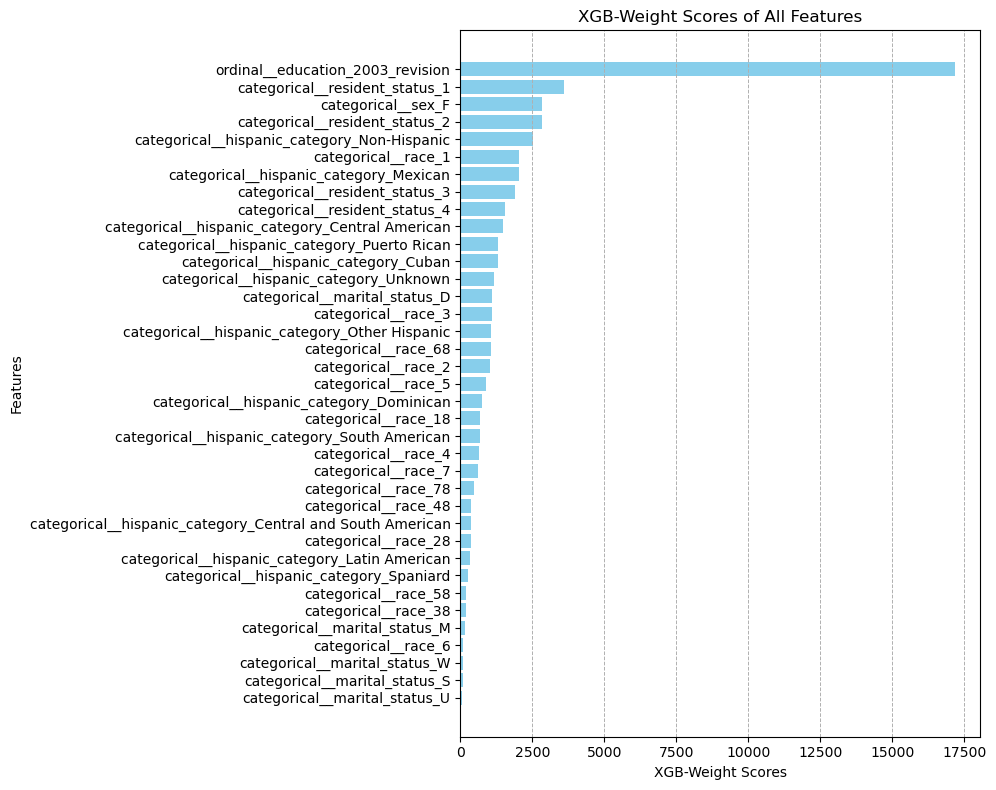

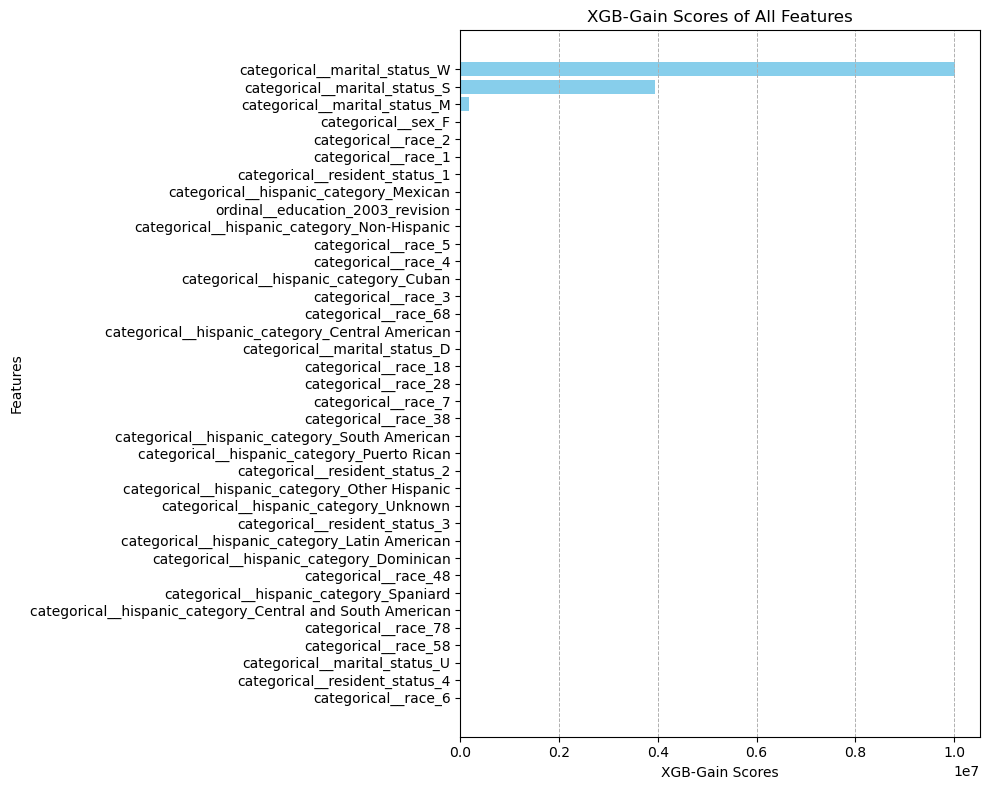

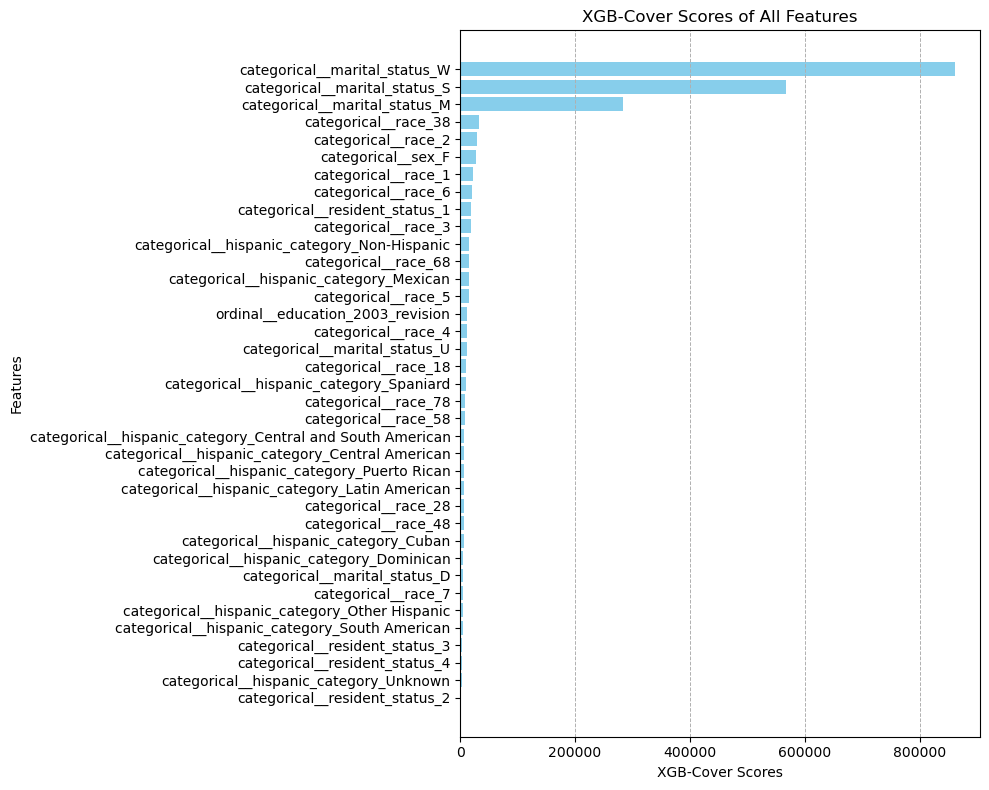

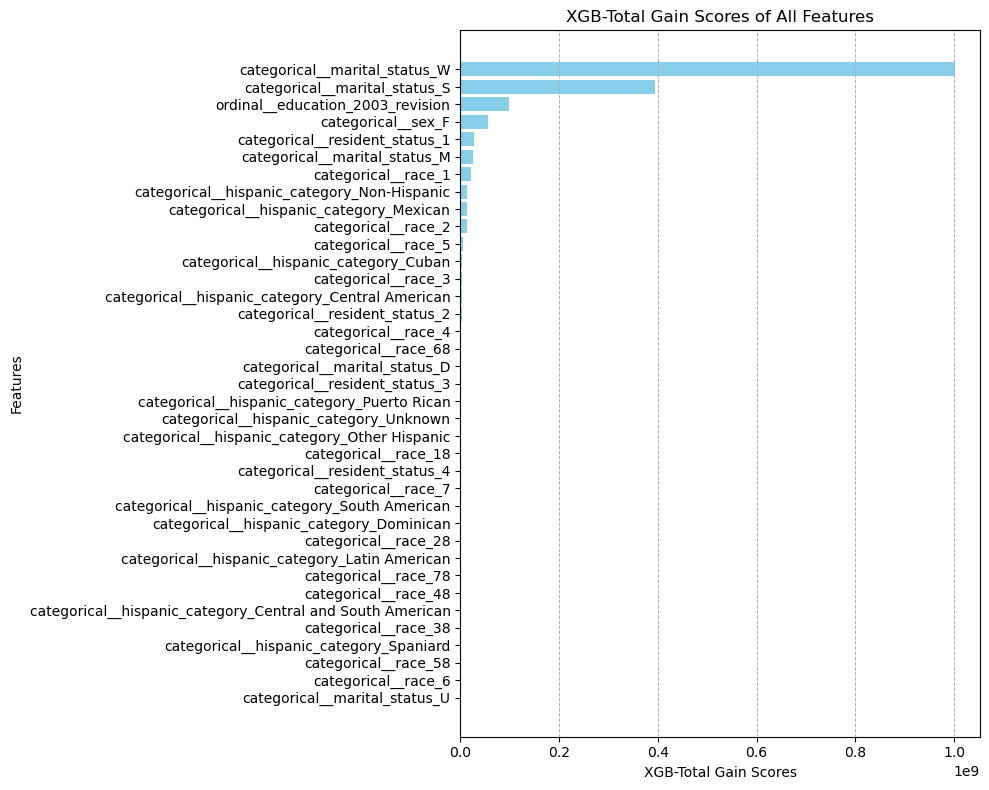

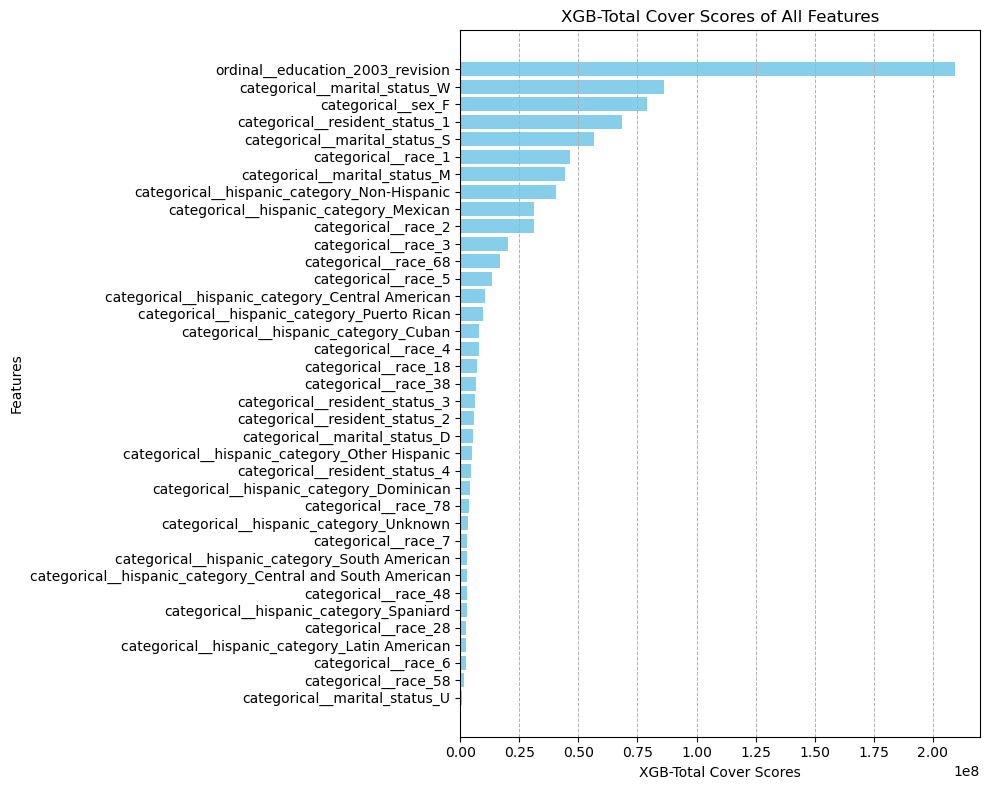

In [240]:
# XGBoost Plots
# Find the index of the best model (lowest RMSE)
best_model_index = np.argmin(xgb_test_rmses)
best_model = xgb_best_models[best_model_index]
best_X_test = xgb_X_test_all[best_model_index]
best_y_test = xgb_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
# Using xgb_y_test_preds_all and xgb_y_test_true_all for the scatter plot
best_y_test_preds = xgb_y_test_preds_all[best_model_index]
best_y_test_true = xgb_y_test_true_all[best_model_index]

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 7))
plt.scatter(best_y_test_true, best_y_test_preds, alpha=0.6, edgecolor='k')
plt.plot([min(best_y_test_true), max(best_y_test_true)], 
         [min(best_y_test_true), max(best_y_test_true)], 'r--', lw=2) 
plt.title("XGB: True vs. Predicted Values")
plt.xlabel("True Values('detail_age' in Year)")
plt.ylabel("Predicted Values('detail_age' in Year)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/xgb/xgb_true_vs_pred.png', dpi=300, bbox_inches='tight')
plt.show()


# Permutation Importance for preprocessed data
result = permutation_importance(best_model, best_X_test, best_y_test, n_repeats= 10, n_jobs= -1, random_state=random_states[best_model_index])
permutation_importance_result = pd.DataFrame({"importances_mean": result.importances_mean, "importances_std": result.importances_std, "feature_name": feature_names})
permutation_importance_result = permutation_importance_result.sort_values(by="importances_mean", ascending=False)
print(permutation_importance_result)

plt.figure(figsize=(10, 8))
plt.barh(permutation_importance_result["feature_name"], permutation_importance_result["importances_mean"], xerr = permutation_importance_result["importances_std"])
plt.title("XGB: Permutation Importances of Preprocessed Features (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/xgb/xgb_permutation_importance_preprocessed.png', dpi=300, bbox_inches='tight')
plt.show()

best_xgb_model = best_model
booster = best_xgb_model.get_booster()

# Get feature importance scores
weight_scores = booster.get_score(importance_type='weight') 
gain_scores = booster.get_score(importance_type='gain') 
cover_scores = booster.get_score(importance_type='cover')   
total_gain_scores = booster.get_score(importance_type='total_gain') 
total_cover_scores = booster.get_score(importance_type='total_cover')

# Extract actual feature names from the pipeline
mapped_feature_names = {f"f{i}": name for i, name in enumerate(feature_names)}

# Helper function to map feature names
def map_feature_names(df, feature_map):
    df = df.rename(index=feature_map)
    return df

# Weight Scores
df_weight = pd.DataFrame.from_dict(weight_scores, orient='index', columns=['weight'])
df_weight = map_feature_names(df_weight, mapped_feature_names)  # Map feature names
df_weight_sorted = df_weight.sort_values(by="weight", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_weight_sorted.index, df_weight_sorted["weight"], color='skyblue')
plt.title("XGB-Weight Scores of All Features")
plt.xlabel("XGB-Weight Scores")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/xgb/xgb_weight_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Gain Scores
df_gain = pd.DataFrame.from_dict(gain_scores, orient='index', columns=['gain'])
df_gain = map_feature_names(df_gain, mapped_feature_names)  # Map feature names
df_gain_sorted = df_gain.sort_values(by="gain", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_gain_sorted.index, df_gain_sorted["gain"], color='skyblue')
plt.title("XGB-Gain Scores of All Features")
plt.xlabel("XGB-Gain Scores")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/xgb/xgb_gain_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Cover Scores
df_cover = pd.DataFrame.from_dict(cover_scores, orient='index', columns=['cover'])
df_cover = map_feature_names(df_cover, mapped_feature_names)  # Map feature names
df_cover_sorted = df_cover.sort_values(by="cover", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_cover_sorted.index, df_cover_sorted["cover"], color='skyblue')
plt.title("XGB-Cover Scores of All Features")
plt.xlabel("XGB-Cover Scores")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/xgb/xgb_cover_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Gain Scores
df_total_gain = pd.DataFrame.from_dict(total_gain_scores, orient='index', columns=['total_gain'])
df_total_gain = map_feature_names(df_total_gain, mapped_feature_names)  # Map feature names
df_total_gain_sorted = df_total_gain.sort_values(by="total_gain", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_total_gain_sorted.index, df_total_gain_sorted["total_gain"], color='skyblue')
plt.title("XGB-Total Gain Scores of All Features")
plt.xlabel("XGB-Total Gain Scores")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/xgb/xgb_total_gain_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Total Cover Scores
df_total_cover = pd.DataFrame.from_dict(total_cover_scores, orient='index', columns=['total_cover'])
df_total_cover = map_feature_names(df_total_cover, mapped_feature_names)  # Map feature names
df_total_cover_sorted = df_total_cover.sort_values(by="total_cover", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_total_cover_sorted.index, df_total_cover_sorted["total_cover"], color='skyblue')
plt.title("XGB-Total Cover Scores of All Features")
plt.xlabel("XGB-Total Cover Scores")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('figures/xgb/xgb_total_cover_scores.png', dpi=300, bbox_inches='tight')
plt.show()

100%|===================| 4988/5000 [00:40<00:00]        

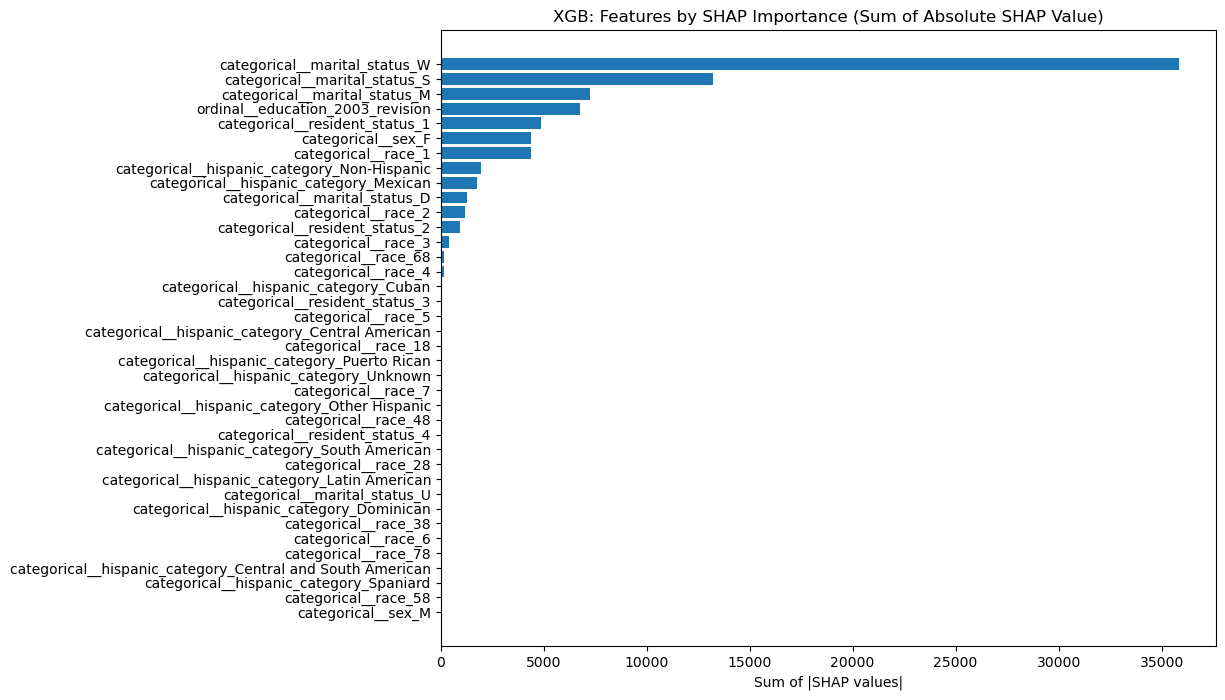

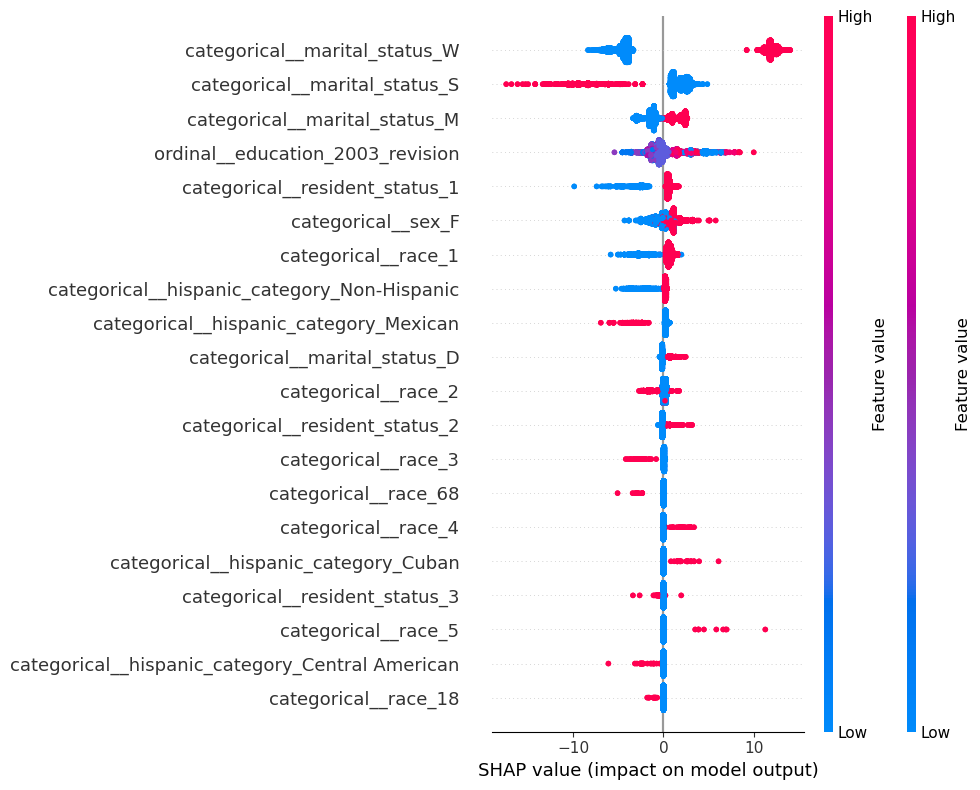

In [241]:
# SHAP
# Use only the first 5000 data points
xgb_X_test_subset = xgb_X_test_preprocessed_all[best_model_index][:5000]

best_xgb_model.set_params(n_jobs=-1)

# Initialize the SHAP explainer with the subset
explainer = shap.Explainer(best_xgb_model, xgb_X_test_subset)

# Calculate SHAP values for the subset
xgb_shap_values = explainer(xgb_X_test_subset)
xgb_shap_values_array = xgb_shap_values.values

# Compute the global SHAP importance for the subset
xgb_shap_summary = np.sum(np.abs(xgb_shap_values_array), axis=0)
indcs = np.argsort(xgb_shap_summary)

# Sort features by importance
xgb_shap_summary_sorted = xgb_shap_summary[indcs]
xgb_sorted_feature_names = np.array(feature_names)[indcs]

# Plot Global SHAP Importance for the subset
plt.figure(figsize=(10, 8))
plt.barh(xgb_sorted_feature_names, xgb_shap_summary_sorted)
plt.xlabel('Sum of |SHAP values|')
plt.title('XGB: Features by SHAP Importance (Sum of Absolute SHAP Value)')
plt.savefig('figures/xgb/xgb_shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP summary plot for the subset
shap.summary_plot(xgb_shap_values, xgb_X_test_subset, feature_names=feature_names, plot_size=(10, 8), show=False)
plt.savefig('figures/xgb/xgb_shap_summary.png', dpi=300, bbox_inches='tight')
shap.summary_plot(xgb_shap_values, xgb_X_test_subset, feature_names=feature_names, plot_size=(10, 8))

In [242]:
#SHAP Forceplot 1 (instance_index = 40)
# Set up the directory for saving
save_dir = 'figures/xgb'
os.makedirs(save_dir, exist_ok=True)

# Generate the SHAP force plot
instance_index = 40
force_plot = shap.force_plot(
    base_value=xgb_shap_values.base_values[instance_index], 
    shap_values=xgb_shap_values.values[instance_index], 
    features=xgb_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names  
)
shap.save_html(f"{save_dir}/xgb_force_plot_instance_40.html", force_plot)

In [243]:
#SHAP forceplot 1 (index = 40)
instance_index =40

# Generate the force plot using the Explanation object
shap.force_plot(
    base_value=xgb_shap_values.base_values[instance_index], 
    shap_values=xgb_shap_values.values[instance_index], 
    features=xgb_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names  
)


In [244]:
#SHAP forceplot 2 (index = 20)
# Generate the SHAP force plot
instance_index = 20
force_plot = shap.force_plot(
    base_value=xgb_shap_values.base_values[instance_index], 
    shap_values=xgb_shap_values.values[instance_index], 
    features=xgb_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names  
)
shap.save_html(f"{save_dir}/xgb_force_plot_instance_20.html", force_plot)

In [245]:
#SHAP forceplot 2 (index = 20)
instance_index = 20

# Generate the force plot using the Explanation object
shap.force_plot(
    base_value=xgb_shap_values.base_values[instance_index], 
    shap_values=xgb_shap_values.values[instance_index], 
    features=xgb_X_test_preprocessed_all[best_model_index][instance_index], 
    feature_names=feature_names  
)


# Model Analysis and Comparison

/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/3593338573.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=models, showmeans=True, meanline=True)


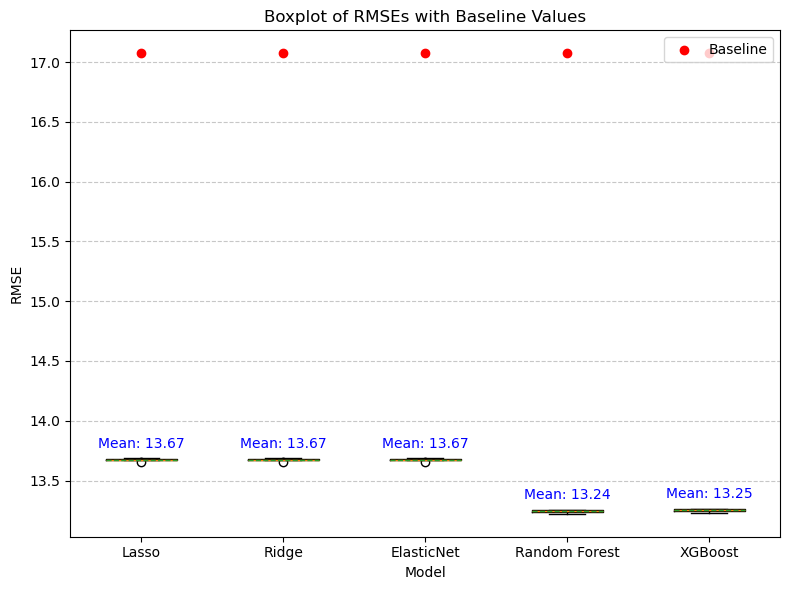

/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/3593338573.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(synthetic_data, labels=models, showmeans=True, meanline=True)


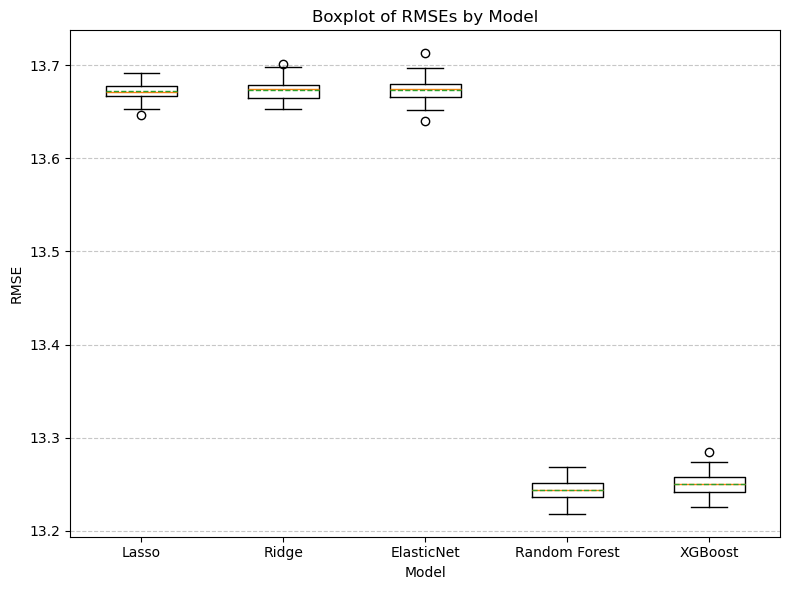

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    lasso_test_rmses,
    ridge_test_rmses,
    elasticnet_test_rmses,
    randomforest_test_rmses,
    xgb_test_rmses
]
models = ['Lasso', 'Ridge', 'ElasticNet', 'Random Forest', 'XGBoost']

lasso_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
ridge_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
elasticnet_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
randomforest_mean_baseline_rmses = np.mean(randomforest_baseline_rmses)
xgb_mean_baseline_rmses = np.mean(xgb_baseline_rmses)

baseline_rmses = [
    lasso_mean_baseline_rmses,
    ridge_mean_baseline_rmses,
    elasticnet_mean_baseline_rmses,
    randomforest_mean_baseline_rmses,
    xgb_mean_baseline_rmses
]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=models, showmeans=True, meanline=True)
plt.title('Boxplot of RMSEs with Baseline Values')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (rmse_values, baseline) in enumerate(zip(data, baseline_rmses), start=1):
    mean_rmse = np.mean(rmse_values)
    plt.text(i, mean_rmse + 0.1, f'Mean: {mean_rmse:.2f}', horizontalalignment='center', fontsize=10, color='blue')
    plt.scatter(i, baseline, color='red', label='Baseline' if i == 1 else "", zorder=5)

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/overall_comparison/Boxplot of RMSEs with Baseline Values.png', dpi=300, bbox_inches='tight')
plt.show()

mean_rmses = [
    lasso_mean_test_rmses, ridge_mean_test_rmses, elasticnet_mean_test_rmses,
    randomforest_mean_test_rmses, xgb_mean_test_rmses
]
std_devs = [
    lasso_sd_test_rmses, ridge_sd_test_rmses, elasticnet_sd_test_rmses,
    randomforest_sd_test_rmses, xgb_sd_test_rmses
]

np.random.seed(42)
synthetic_data = [
    np.random.normal(loc=mean, scale=std, size=100)
    for mean, std in zip(mean_rmses, std_devs)
]

plt.figure(figsize=(8, 6))
plt.boxplot(synthetic_data, labels=models, showmeans=True, meanline=True)
plt.title('Boxplot of RMSEs by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/overall_comparison/Boxplot of RMSEs by Model.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/3593338573.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=models, showmeans=True, meanline=True)


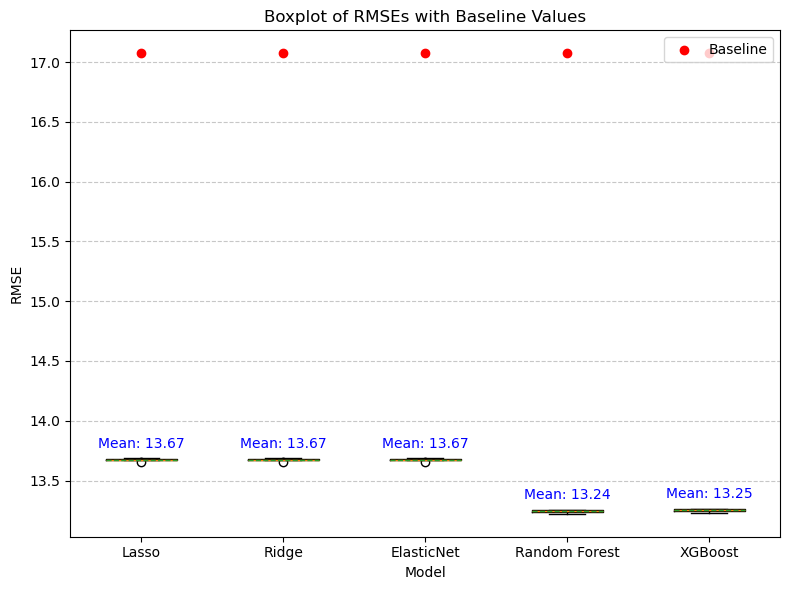

/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/3593338573.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(synthetic_data, labels=models, showmeans=True, meanline=True)


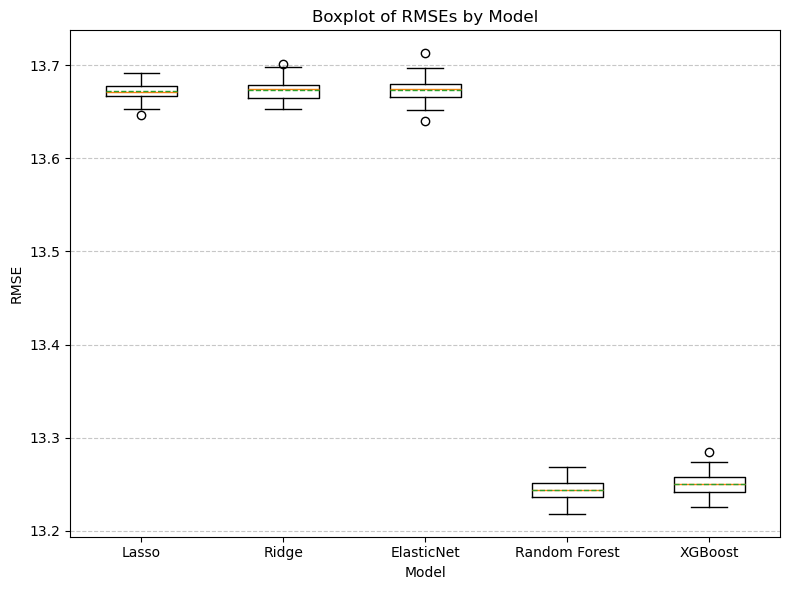

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    lasso_test_rmses,
    ridge_test_rmses,
    elasticnet_test_rmses,
    randomforest_test_rmses,
    xgb_test_rmses
]
models = ['Lasso', 'Ridge', 'ElasticNet', 'Random Forest', 'XGBoost']

lasso_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
ridge_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
elasticnet_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
randomforest_mean_baseline_rmses = np.mean(randomforest_baseline_rmses)
xgb_mean_baseline_rmses = np.mean(xgb_baseline_rmses)

baseline_rmses = [
    lasso_mean_baseline_rmses,
    ridge_mean_baseline_rmses,
    elasticnet_mean_baseline_rmses,
    randomforest_mean_baseline_rmses,
    xgb_mean_baseline_rmses
]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=models, showmeans=True, meanline=True)
plt.title('Boxplot of RMSEs with Baseline Values')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (rmse_values, baseline) in enumerate(zip(data, baseline_rmses), start=1):
    mean_rmse = np.mean(rmse_values)
    plt.text(i, mean_rmse + 0.1, f'Mean: {mean_rmse:.2f}', horizontalalignment='center', fontsize=10, color='blue')
    plt.scatter(i, baseline, color='red', label='Baseline' if i == 1 else "", zorder=5)

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/overall_comparison/Boxplot of RMSEs with Baseline Values.png', dpi=300, bbox_inches='tight')
plt.show()

mean_rmses = [
    lasso_mean_test_rmses, ridge_mean_test_rmses, elasticnet_mean_test_rmses,
    randomforest_mean_test_rmses, xgb_mean_test_rmses
]
std_devs = [
    lasso_sd_test_rmses, ridge_sd_test_rmses, elasticnet_sd_test_rmses,
    randomforest_sd_test_rmses, xgb_sd_test_rmses
]

np.random.seed(42)
synthetic_data = [
    np.random.normal(loc=mean, scale=std, size=100)
    for mean, std in zip(mean_rmses, std_devs)
]

plt.figure(figsize=(8, 6))
plt.boxplot(synthetic_data, labels=models, showmeans=True, meanline=True)
plt.title('Boxplot of RMSEs by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/overall_comparison/Boxplot of RMSEs by Model.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/3593338573.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=models, showmeans=True, meanline=True)


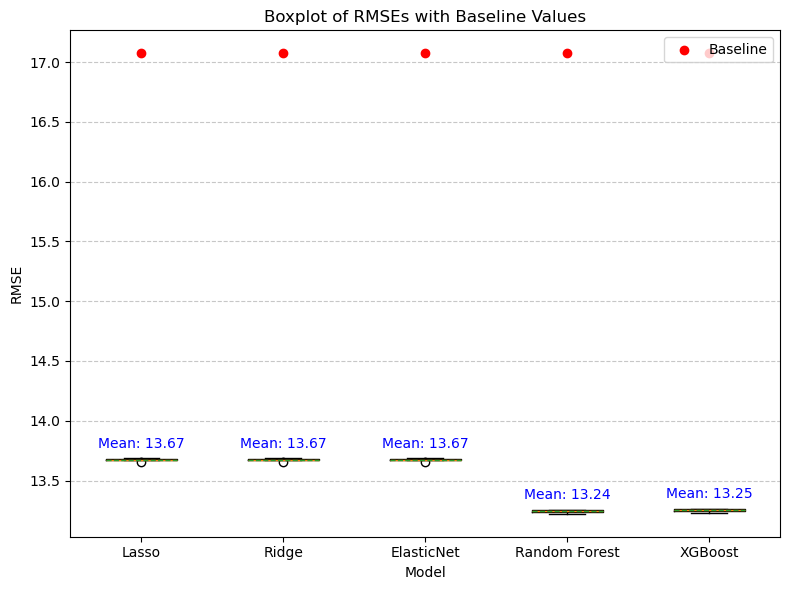

/var/folders/b6/mjk42qhj6q3d2xkg39_smlz00000gn/T/ipykernel_25911/3593338573.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(synthetic_data, labels=models, showmeans=True, meanline=True)


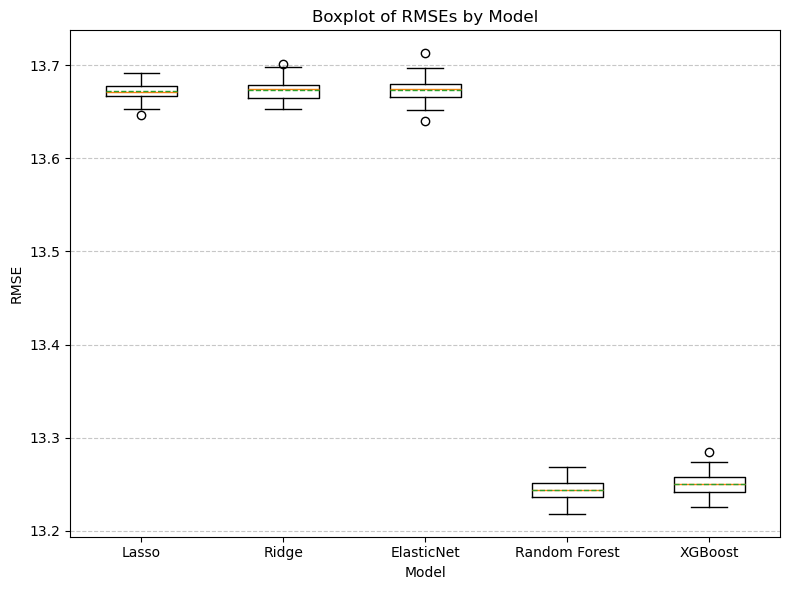

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    lasso_test_rmses,
    ridge_test_rmses,
    elasticnet_test_rmses,
    randomforest_test_rmses,
    xgb_test_rmses
]
models = ['Lasso', 'Ridge', 'ElasticNet', 'Random Forest', 'XGBoost']

lasso_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
ridge_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
elasticnet_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
randomforest_mean_baseline_rmses = np.mean(randomforest_baseline_rmses)
xgb_mean_baseline_rmses = np.mean(xgb_baseline_rmses)

baseline_rmses = [
    lasso_mean_baseline_rmses,
    ridge_mean_baseline_rmses,
    elasticnet_mean_baseline_rmses,
    randomforest_mean_baseline_rmses,
    xgb_mean_baseline_rmses
]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=models, showmeans=True, meanline=True)
plt.title('Boxplot of RMSEs with Baseline Values')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (rmse_values, baseline) in enumerate(zip(data, baseline_rmses), start=1):
    mean_rmse = np.mean(rmse_values)
    plt.text(i, mean_rmse + 0.1, f'Mean: {mean_rmse:.2f}', horizontalalignment='center', fontsize=10, color='blue')
    plt.scatter(i, baseline, color='red', label='Baseline' if i == 1 else "", zorder=5)

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/overall_comparison/Boxplot of RMSEs with Baseline Values.png', dpi=300, bbox_inches='tight')
plt.show()

mean_rmses = [
    lasso_mean_test_rmses, ridge_mean_test_rmses, elasticnet_mean_test_rmses,
    randomforest_mean_test_rmses, xgb_mean_test_rmses
]
std_devs = [
    lasso_sd_test_rmses, ridge_sd_test_rmses, elasticnet_sd_test_rmses,
    randomforest_sd_test_rmses, xgb_sd_test_rmses
]

np.random.seed(42)
synthetic_data = [
    np.random.normal(loc=mean, scale=std, size=100)
    for mean, std in zip(mean_rmses, std_devs)
]

plt.figure(figsize=(8, 6))
plt.boxplot(synthetic_data, labels=models, showmeans=True, meanline=True)
plt.title('Boxplot of RMSEs by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/overall_comparison/Boxplot of RMSEs by Model.png', dpi=300, bbox_inches='tight')
plt.show()


In [247]:
print(np.std(lasso_baseline_rmses))
print(np.std(ridge_baseline_rmses))
print(np.std(elasticnet_baseline_rmses))
print(np.std(randomforest_baseline_rmses))
print(np.std(xgb_baseline_rmses))

0.003503987396164837
0.003503987396164837
0.003503987396164837
0.003503987396164837
0.003503987396164837


In [248]:
lasso_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
ridge_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
elasticnet_mean_baseline_rmses = np.mean(elasticnet_baseline_rmses)
randomforest_mean_baseline_rmses = np.mean(randomforest_baseline_rmses)
xgb_mean_baseline_rmses = np.mean(xgb_baseline_rmses)


print("xgb_mean_baseline_rmses:", xgb_mean_baseline_rmses)
print("lasso_mean_baseline_rmses:", lasso_mean_baseline_rmses)
print("elasticnet_mean_baseline_rmses:", elasticnet_mean_baseline_rmses)
print("randomforest_mean_baseline_rmses:", randomforest_mean_baseline_rmses)
print("xgb_mean_baseline_rmses:", xgb_mean_baseline_rmses)
print()
print("lasso_mean_test_rmses:", lasso_mean_test_rmses, "lasso_sd_test_rmses:", lasso_sd_test_rmses)
print("ridge_mean_test_rmses:", ridge_mean_test_rmses, "ridge_sd_test_rmses:", ridge_sd_test_rmses)
print("elasticnet_mean_test_rmses:", elasticnet_mean_test_rmses, "elasticnet_sd_test_rmses:", elasticnet_sd_test_rmses)
print("randomforest_mean_test_rmses:", randomforest_mean_test_rmses, "randomforest_sd_test_rmses:", randomforest_sd_test_rmses)
print("xgb_mean_test_rmses:", xgb_mean_test_rmses, "xgb_sd_test_rmses:", xgb_sd_test_rmses)
print()
print(best_lasso_model)
print(best_ridge_model)
print(best_elasticnet_model)
print(best_randomforest_model)
print(best_xgb_model)

print(elasticnet_best_models[3])

xgb_mean_baseline_rmses: 17.07286207606538
lasso_mean_baseline_rmses: 17.07286207606538
elasticnet_mean_baseline_rmses: 17.07286207606538
randomforest_mean_baseline_rmses: 17.07286207606538
xgb_mean_baseline_rmses: 17.07286207606538

lasso_mean_test_rmses: 13.67289586490745 lasso_sd_test_rmses: 0.01029476718789038
ridge_mean_test_rmses: 13.672889909829669 ridge_sd_test_rmses: 0.01029743432682552
elasticnet_mean_test_rmses: 13.67289166391323 elasticnet_sd_test_rmses: 0.01029078083211256
randomforest_mean_test_rmses: 13.243056396378702 randomforest_sd_test_rmses: 0.011615043014161794
xgb_mean_test_rmses: 13.250956644338455 xgb_sd_test_rmses: 0.010913203873509828

Lasso(alpha=0.001, max_iter=10000)
Ridge(alpha=100, max_iter=10000)
ElasticNet(alpha=0.001, max_iter=10000)
RandomForestRegressor(max_depth=12, max_features=0.775, n_jobs=-1)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None,

In [194]:
#Save preprocessed data (cleaned, and preprocessed through preprocessing pipeline--OnehotEncoder, OrdinalEncoder, StandardScaler)
df_preprocessed_array = preprocessing_pipeline.transform(df_cleaned)

feature_names = preprocessing_pipeline.get_feature_names_out()
df_preprocessed = pd.DataFrame(df_preprocessed_array, columns=feature_names)

local_path = "/Users/zhouwenjun/Desktop/DATA 1030 Final Project Data/2015_cdc_mortality_data_preprocessed.csv"
df_preprocessed.to_csv(local_path, index=False)